In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('/train.csv')
test = pd.read_csv('/test.csv')

def process_datetime(data):

    # datetime 컬럼 처리
    data['ATA'] = pd.to_datetime(data['ATA'])

    # datetime을 여러 파생 변수로 변환
    data['year'] = data['ATA'].dt.year
    data['month'] = data['ATA'].dt.month
    data['day'] = data['ATA'].dt.day
    data['hour'] = data['ATA'].dt.hour
    data['minute'] = data['ATA'].dt.minute
    data['weekday'] = data['ATA'].dt.weekday

    return data

data = data.sort_values('ATA')
data = process_datetime(data)
test = process_datetime(test)

data

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR,year,month,day,hour,minute,weekday
322693,TRAIN_322693,BR,VFD8,Bulk,0.000000,2014-09-01 00:05:00,S736157,30.0,22,50300,20.0,10.0,28000,190.0,SDES23,Panama,NaN,NaN,NaN,NaN,22,0.000061,0.000000,2014,9,1,0,5,0
244665,TRAIN_244665,ZA,CXL1,Bulk,49.910085,2014-09-01 00:05:00,A876246,40.0,12,175000,20.0,20.0,91500,290.0,TEIF28,Panama,NaN,NaN,NaN,NaN,2,0.000026,48.778889,2014,9,1,0,5,0
352736,TRAIN_352736,ZA,CXL1,Bulk,0.000000,2014-09-01 00:05:00,I488233,40.0,12,181000,20.0,20.0,92800,290.0,YIDV54,Isle Of Man,NaN,NaN,NaN,NaN,2,0.000026,0.000000,2014,9,1,0,5,0
282660,TRAIN_282660,BR,MMW5,Bulk,32.304726,2014-09-01 00:12:00,G218822,30.0,13,56800,20.0,10.0,33000,190.0,KKOX68,Liberia,NaN,NaN,NaN,NaN,22,0.000051,265.620556,2014,9,1,0,12,0
151588,TRAIN_151588,BR,VFD8,Bulk,0.000000,2014-09-01 00:14:00,S763672,30.0,14,76600,20.0,10.0,39700,220.0,FAJR56,Panama,NaN,NaN,NaN,NaN,22,0.000061,0.000000,2014,9,1,0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323571,TRAIN_323571,JP,QYY1,Cargo,0.000000,2023-02-28 08:55:00,P865451,10.0,8,1670,10.0,0.0,500,70.0,NBCV14,Japan,1.07,1.10,15.5,1.499178,17,0.000552,0.000000,2023,2,28,8,55,1
39745,TRAIN_039745,LV,UEW5,Cargo,0.000000,2023-02-28 09:20:00,I872345,10.0,29,4230,10.0,10.0,2900,90.0,KMRW36,Barbados,8.27,-1.46,2.8,4.655602,11,0.000074,0.000000,2023,2,28,9,20,1
83272,TRAIN_083272,CN,EUC8,Bulk,0.000000,2023-02-28 09:27:00,B842831,50.0,2,211000,20.0,20.0,109000,300.0,WAIS64,"Hong Kong, China",-2.21,5.70,13.2,3.767495,17,0.001614,0.000000,2023,2,28,9,27,1
2625,TRAIN_002625,CN,QQW1,Container,0.000000,2023-02-28 09:34:00,Q521624,40.0,22,68200,20.0,10.0,66100,280.0,BGWI26,Liberia,1.65,0.89,14.7,1.713251,17,0.000595,0.000000,2023,2,28,9,34,1


In [ ]:
'''

가설

1. 하나의 ARI_PO 값은 하나의 ARI_CO 값을 가질 수 있다
2. DIST는 음수가 될 수 없다
3. CI_HOUR가 0이면 DIST는 0이어야 한다
4. 선박의 연령은 년도별로 바뀌어야 한다
5. 선박의 깊이(DEPTH)는 흘수(DRAUGHT)보다 작을 수 없다
6. DIST가 0이면 CI_HOUR도 0이어야 한다
7. SHIPMANAGER은 여러개의 선박을 소유할 수 있다
8. 1명의 SHIPMANAGER은 하나의 FLAG만 가질 수 있다
9. 하나의 ID는 하나의 SHIP_TYPE_CATEGORY를 가질 수 있다


'''

'\n\n가설\n\n1. 하나의 ARI_PO 값은 하나의 ARI_CO 값을 가질 수 있다\n2. DIST는 음수가 될 수 없다\n3. CI_HOUR가 0이면 DIST는 0이어야 한다\n4. 선박의 연령은 년도별로 바뀌어야 한다\n5. 선박의 깊이(DEPTH)는 흘수(DRAUGHT)보다 작을 수 없다\n6. DIST가 0이면 CI_HOUR도 0이어야 한다\n7. SHIPMANAGER은 여러개의 선박을 소유할 수 있다\n8. 1명의 SHIPMANAGER은 하나의 FLAG만 가질 수 있다\n9. 하나의 ID는 하나의 SHIP_TYPE_CATEGORY를 가질 수 있다\n\n\n'

# 가설 1. 하나의 ARI_PO 값은 하나의 ARI_CO 값을 가질 수 있다

In [ ]:
list_po = data.ARI_PO.unique()

for po in list_po:
    COs = data[data['ARI_PO'] == po]['ARI_CO']

    if len(COs.unique()) != 1:
        print(f'\n{po} | {COs.unique()}')


# EKP8 항구에서 ['CN' 'TW'] 두가지 나라 값을 가지고 있음


EKP8 | ['CN' 'TW']


### 가설 1-1. EKP8 항구의 국가는 특정 년도를 기점으로 바꼈을 것이다

In [ ]:
data_1_1 = data[data['ARI_PO'] == 'EKP8']

cn_ata = data_1_1[data_1_1['ARI_CO'] == 'CN']['ATA']
tw_ata = data_1_1[data_1_1['ARI_CO'] == 'TW']['ATA']


print(f'CN : Min {cn_ata.min()}, Max {cn_ata.max()}')
print(f'TW : Min {tw_ata.min()}, Max {tw_ata.max()}')

# 과거부터 혼용되어 기록되어있음

CN : Min 2014-09-01 04:04:00, Max 2023-02-28 08:20:00
TW : Min 2014-09-03 17:05:00, Max 2023-02-28 13:15:00


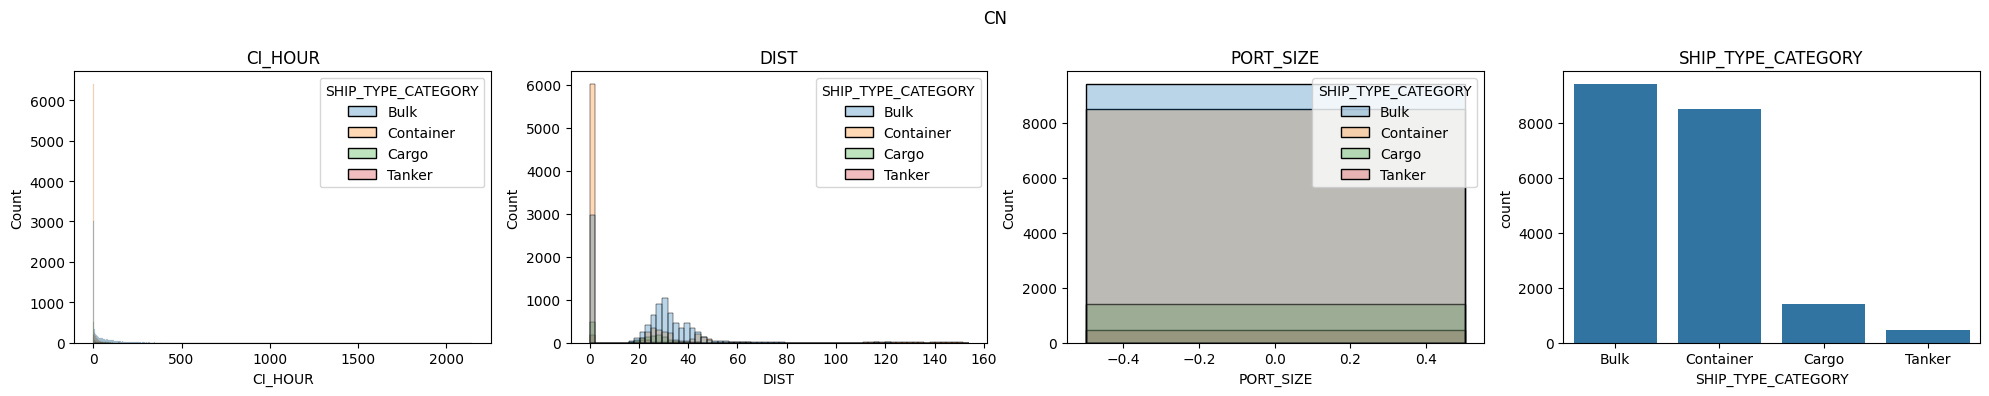

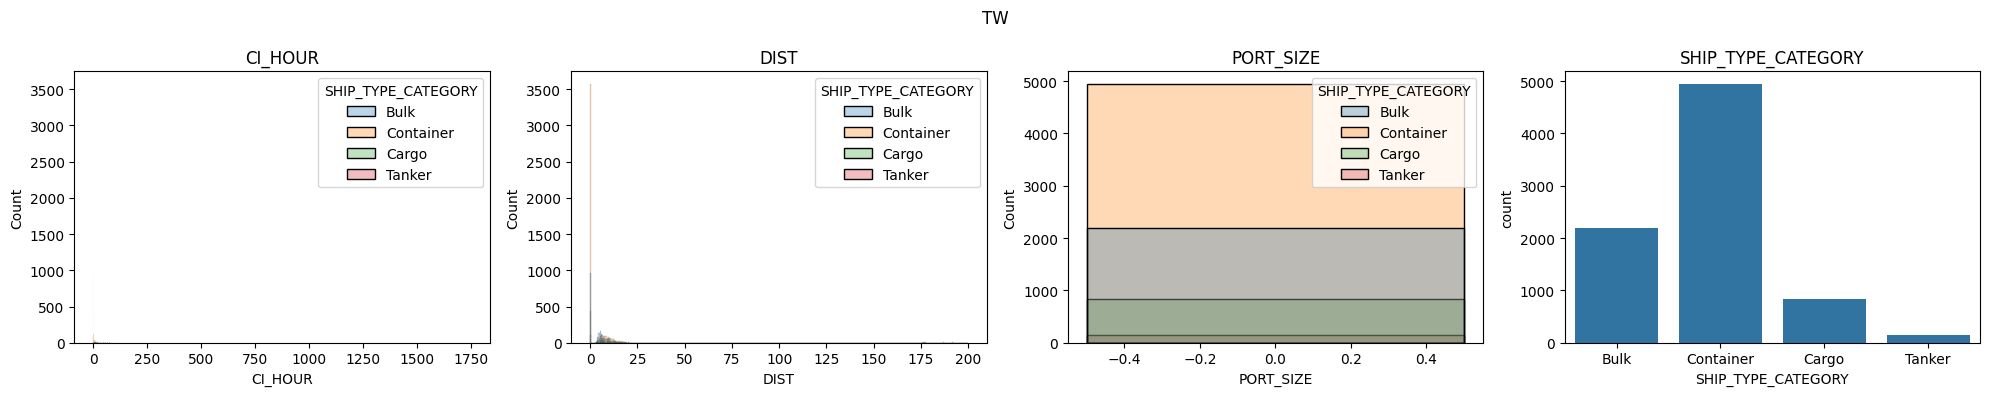

In [ ]:
data_1_1_cn = data_1_1[data_1_1['ARI_CO'] == 'CN']
data_1_1_tw = data_1_1[data_1_1['ARI_CO'] == 'TW']


cols = ['DIST', 'PORT_SIZE', 'CI_HOUR', 'SHIP_TYPE_CATEGORY']

fig, ax = plt.subplots(1, 4, figsize=(20, 4))
sns.histplot(data = data_1_1_cn, x='CI_HOUR', ax=ax[0], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_1_1_cn, x='DIST', ax=ax[1], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_1_1_cn, x='PORT_SIZE', ax=ax[2], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.countplot(data = data_1_1_cn, x='SHIP_TYPE_CATEGORY', ax=ax[3])

ax[0].set_title('CI_HOUR')
ax[1].set_title('DIST')
ax[2].set_title('PORT_SIZE')
ax[3].set_title('SHIP_TYPE_CATEGORY')

plt.suptitle('CN')
plt.tight_layout()
plt.show()
plt.close()


fig, ax = plt.subplots(1, 4, figsize=(20, 4))
sns.histplot(data = data_1_1_tw, x='CI_HOUR', ax=ax[0], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_1_1_tw, x='DIST', ax=ax[1], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_1_1_tw, x='PORT_SIZE', ax=ax[2], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.countplot(data = data_1_1_tw, x='SHIP_TYPE_CATEGORY', ax=ax[3])

ax[0].set_title('CI_HOUR')
ax[1].set_title('DIST')
ax[2].set_title('PORT_SIZE')
ax[3].set_title('SHIP_TYPE_CATEGORY')

plt.suptitle('TW')
plt.tight_layout()
plt.show()


# 같은 항구이나 나라에 따라서 차이를 보이는 것을 알 수 있음
# 주요 변수들의 분포가 다름을 볼 수 있음 이름이 같은 다른 항구라고 판단
    # 추후 전처리 : EKP8 -> EKP8_CN, EKP8_TW

#  CI_HOUR, DIST에 0이 매우 많이 존재함

# 가설 2. DIST는 음수가 될 수 없다

In [ ]:
cond_m = data['DIST'] < 0

print(cond_m.value_counts())


# DIST는 모두 양수이다

DIST
False    391939
Name: count, dtype: int64


# 가설 3. CI_HOUR가 0이면 DIST는 0이어야 한다


In [ ]:
print(((data['CI_HOUR'] == 0) & (data['DIST'] != 0)).value_counts())


# CI_HOUR가 0 일때 DIST는 모두 0 이다

False    391939
Name: count, dtype: int64


### 가설 3-1. CI_HOUR, DIST는 SHIP_TYPE_CATEGORY에 따라 다른 분포를 보인다

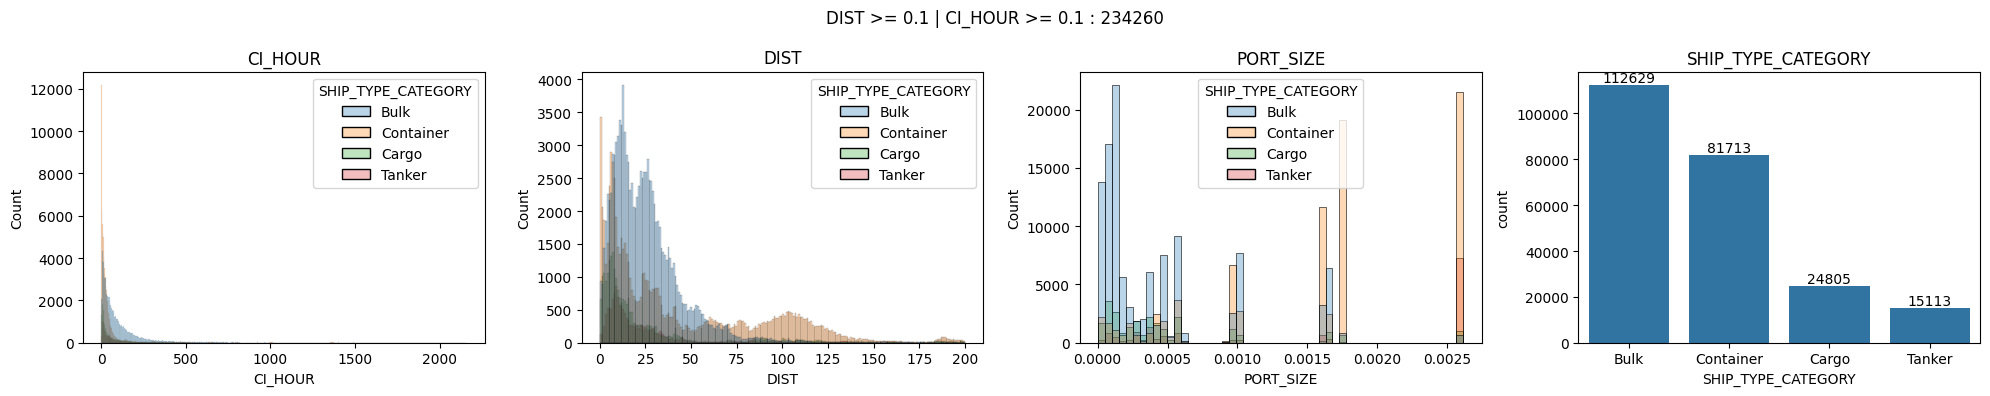

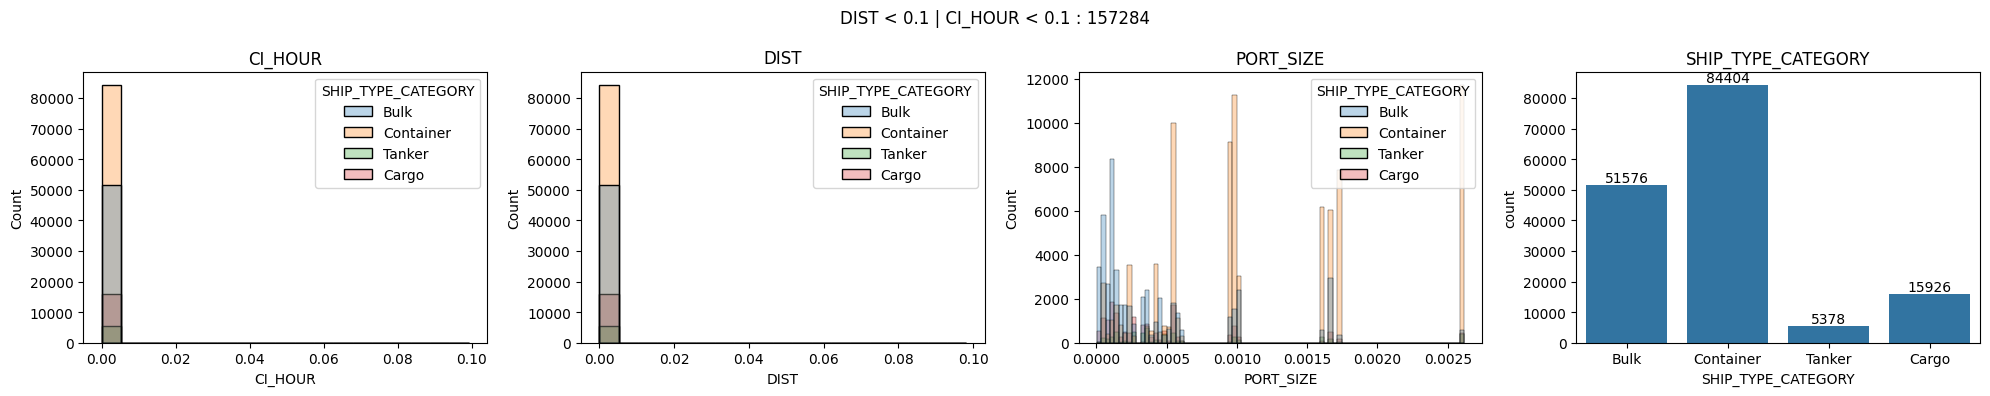

In [ ]:
data_3_1 = data[(data['DIST'] >= 0.1) & (data['CI_HOUR'] >= 0.1)]

fig, ax = plt.subplots(1, 4, figsize=(20, 4))
sns.histplot(data = data_3_1, x='CI_HOUR', ax=ax[0], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_3_1, x='DIST', ax=ax[1], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_3_1, x='PORT_SIZE', ax=ax[2], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.countplot(data = data_3_1, x='SHIP_TYPE_CATEGORY', ax=ax[3])
ax[3].bar_label(ax[3].containers[0])

ax[0].set_title('CI_HOUR')
ax[1].set_title('DIST')
ax[2].set_title('PORT_SIZE')
ax[3].set_title('SHIP_TYPE_CATEGORY')

plt.suptitle(f'DIST >= 0.1 | CI_HOUR >= 0.1 : {data_3_1.shape[0]}')
plt.tight_layout()
plt.show()


data_3_1 = data[(data['DIST'] < 0.1) & (data['CI_HOUR'] < 0.1)]

fig, ax = plt.subplots(1, 4, figsize=(20, 4))
sns.histplot(data = data_3_1, x='CI_HOUR', ax=ax[0], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_3_1, x='DIST', ax=ax[1], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_3_1, x='PORT_SIZE', ax=ax[2], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.countplot(data = data_3_1, x='SHIP_TYPE_CATEGORY', ax=ax[3])
ax[3].bar_label(ax[3].containers[0])


ax[0].set_title('CI_HOUR')
ax[1].set_title('DIST')
ax[2].set_title('PORT_SIZE')
ax[3].set_title('SHIP_TYPE_CATEGORY')

plt.suptitle(f'DIST < 0.1 | CI_HOUR < 0.1 : {data_3_1.shape[0]}')
plt.tight_layout()
plt.show()

# CI_HOUR, DIST모두 0에 가까운 경우
    # SHIP_TYPE_CATEGORY : Bulk > Container > Cargo > Tanker
    # CI_HOUR : 정규분포를 따르지 않고 있음

# CI_HOUR, DIST모두 0이 아닌경우
    # SHIP_TYPE_CATEGORY : Container > Bulk > Cargo > Tanker | 비율이 너무 확 바껴버린다. 연속형 수치를 이렇게 특정 값으로 나누어 보는게 옳은것인가?

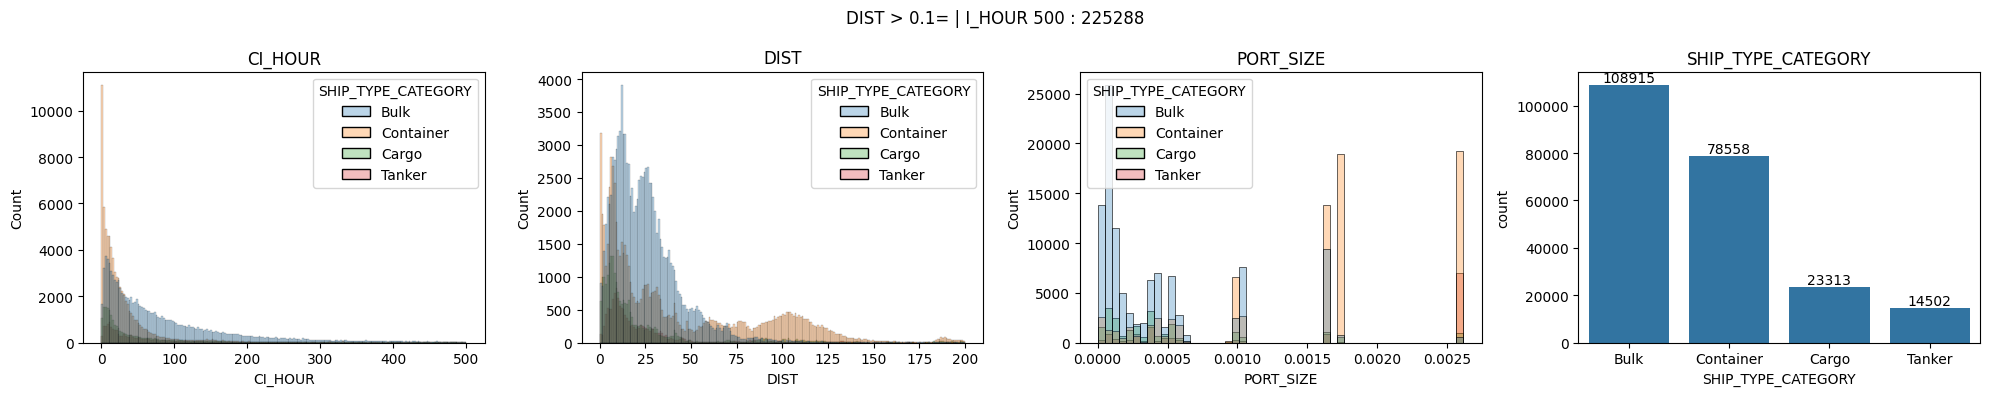

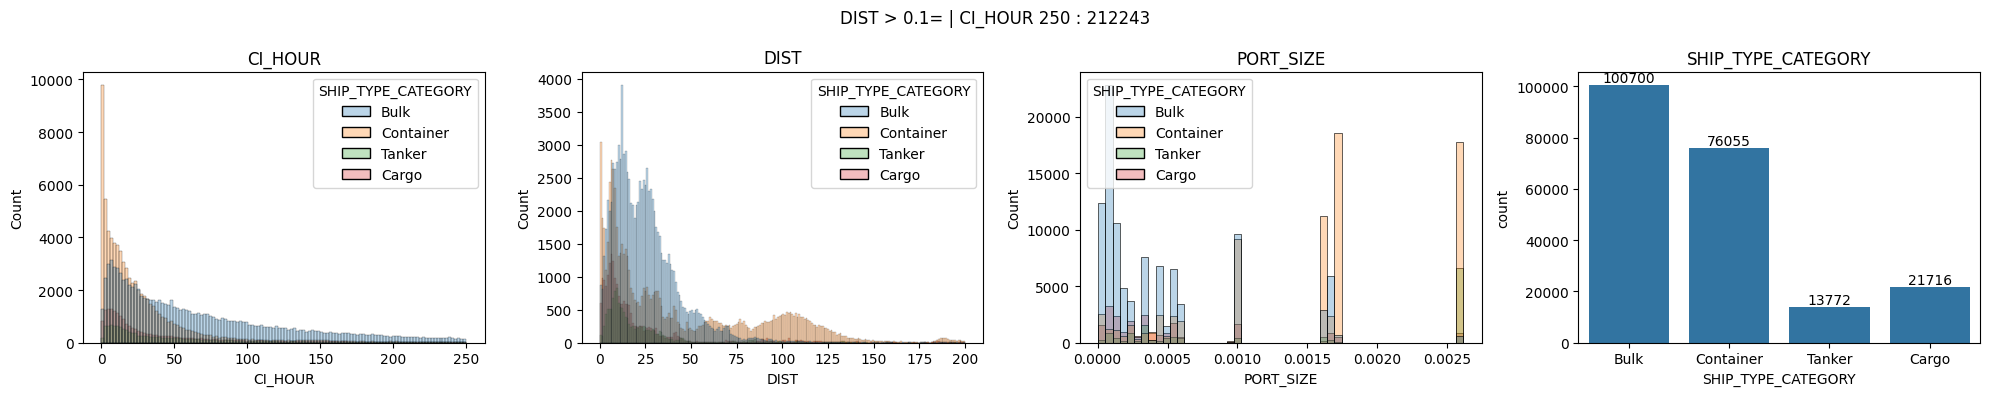

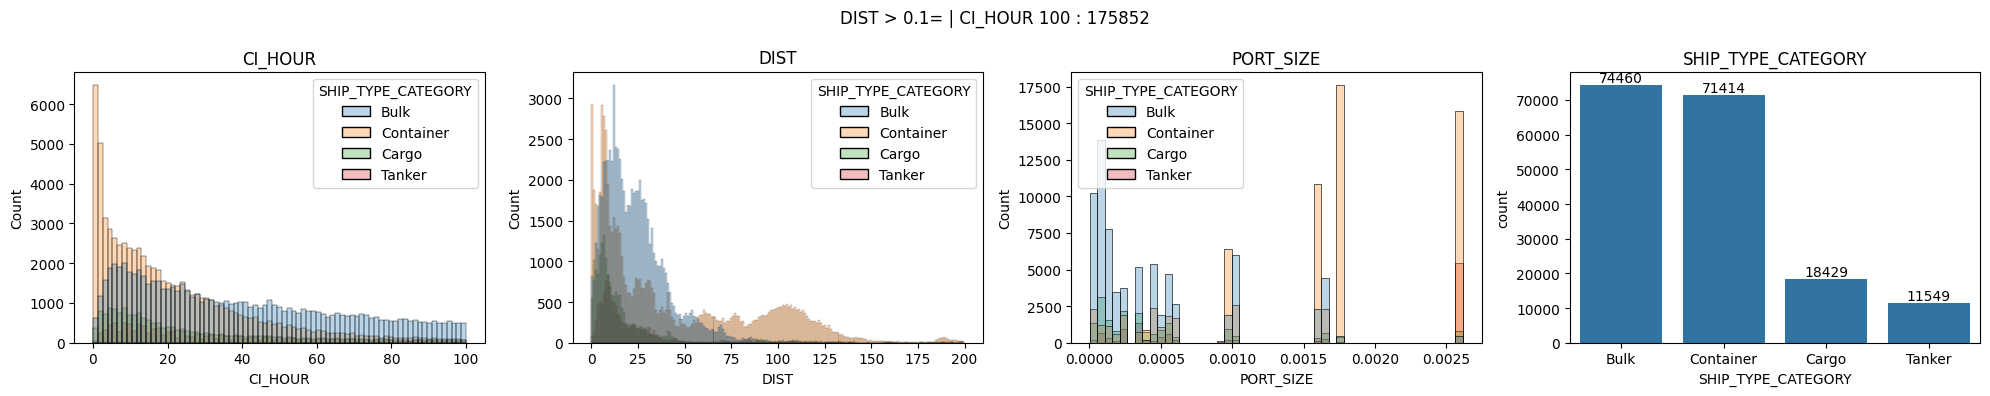

In [ ]:
data_3_1 = data[(data['CI_HOUR'] <= 500) & (data['DIST'] >= 0.1)]

fig, ax = plt.subplots(1, 4, figsize=(20, 4))
sns.histplot(data = data_3_1, x='CI_HOUR', ax=ax[0], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_3_1, x='DIST', ax=ax[1], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_3_1, x='PORT_SIZE', ax=ax[2], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.countplot(data = data_3_1, x='SHIP_TYPE_CATEGORY', ax=ax[3])
ax[3].bar_label(ax[3].containers[0])

ax[0].set_title('CI_HOUR')
ax[1].set_title('DIST')
ax[2].set_title('PORT_SIZE')
ax[3].set_title('SHIP_TYPE_CATEGORY')

plt.suptitle(f'DIST > 0.1= | I_HOUR 500 : {data_3_1.shape[0]}')
plt.tight_layout()
plt.show()

data_3_1 = data[(data['CI_HOUR'] <= 250) & (data['DIST'] >= 0.1)]

fig, ax = plt.subplots(1, 4, figsize=(20, 4))
sns.histplot(data = data_3_1, x='CI_HOUR', ax=ax[0], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_3_1, x='DIST', ax=ax[1], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_3_1, x='PORT_SIZE', ax=ax[2], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.countplot(data = data_3_1, x='SHIP_TYPE_CATEGORY', ax=ax[3])
ax[3].bar_label(ax[3].containers[0])

ax[0].set_title('CI_HOUR')
ax[1].set_title('DIST')
ax[2].set_title('PORT_SIZE')
ax[3].set_title('SHIP_TYPE_CATEGORY')

plt.suptitle(f'DIST > 0.1= | CI_HOUR 250 : {data_3_1.shape[0]}')
plt.tight_layout()
plt.show()


data_3_1 = data[(data['CI_HOUR'] <= 100) & (data['DIST'] >= 0.1)]

fig, ax = plt.subplots(1, 4, figsize=(20, 4))
sns.histplot(data = data_3_1, x='CI_HOUR', ax=ax[0], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_3_1, x='DIST', ax=ax[1], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_3_1, x='PORT_SIZE', ax=ax[2], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.countplot(data = data_3_1, x='SHIP_TYPE_CATEGORY', ax=ax[3])
ax[3].bar_label(ax[3].containers[0])

ax[0].set_title('CI_HOUR')
ax[1].set_title('DIST')
ax[2].set_title('PORT_SIZE')
ax[3].set_title('SHIP_TYPE_CATEGORY')

plt.suptitle(f'DIST > 0.1= | CI_HOUR 100 : {data_3_1.shape[0]}')
plt.tight_layout()
plt.show()

# Bulk : DIST가 CI_HOUR를 따라가지 않는다

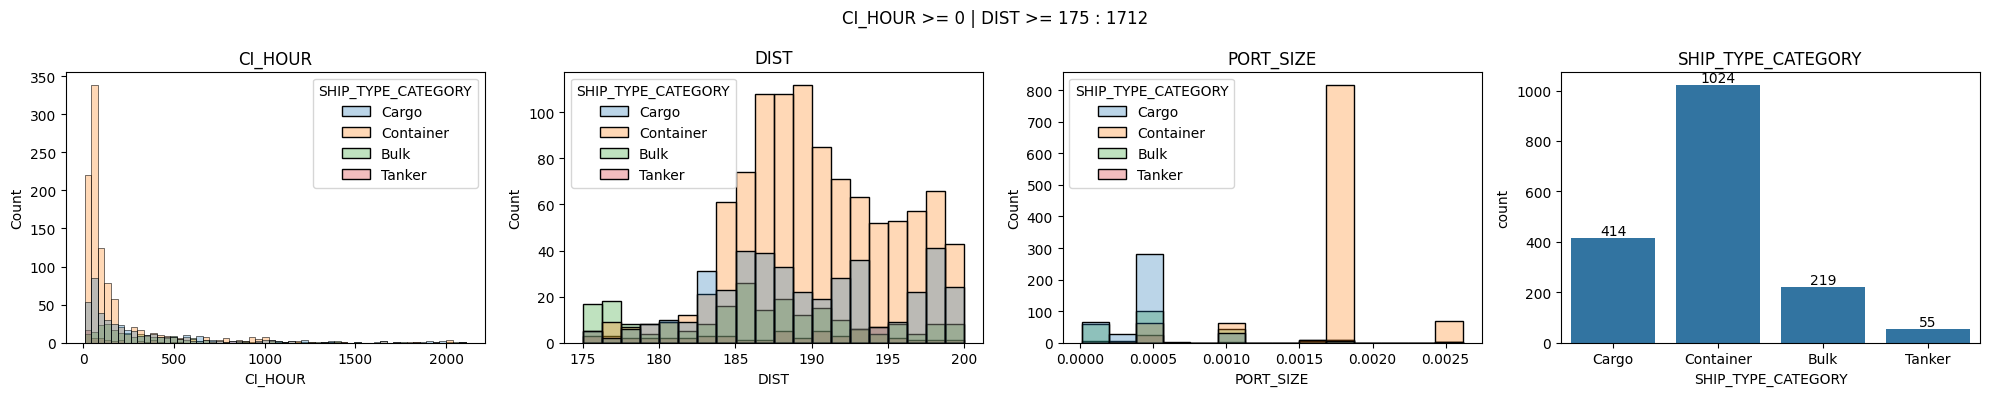

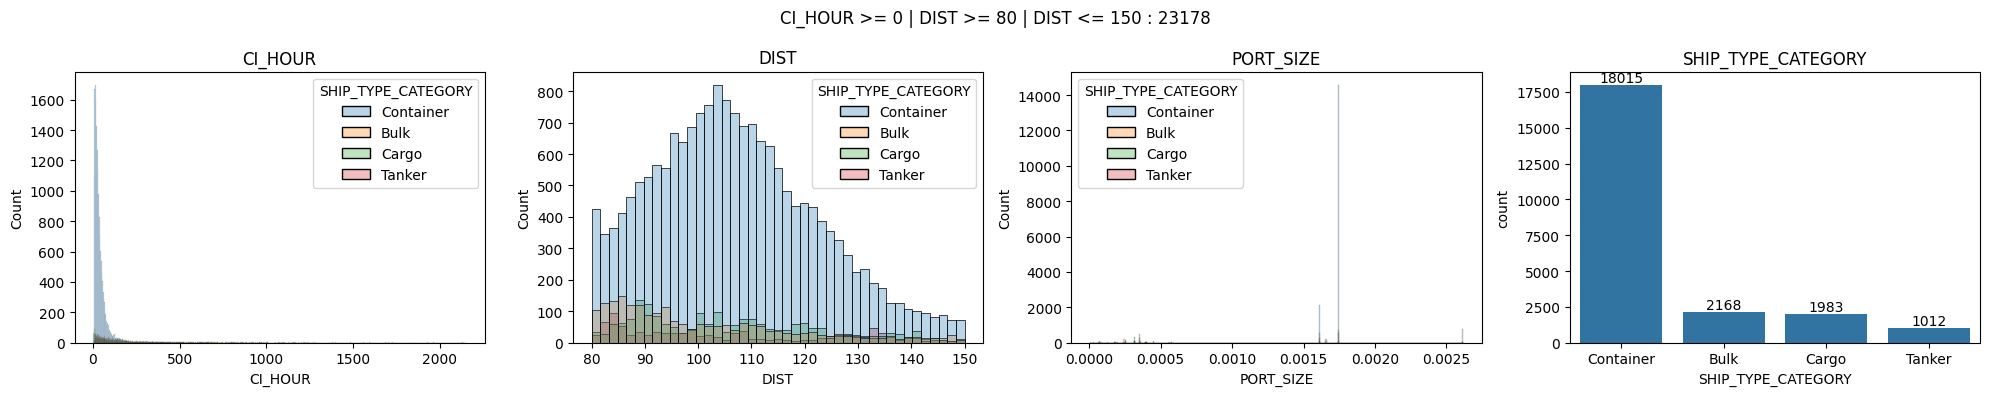

In [ ]:
data_3_1 = data[(data['CI_HOUR'] >= 0) & (data['DIST'] >= 175)]

fig, ax = plt.subplots(1, 4, figsize=(20, 4))
sns.histplot(data = data_3_1, x='CI_HOUR', ax=ax[0], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_3_1, x='DIST', ax=ax[1], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_3_1, x='PORT_SIZE', ax=ax[2], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.countplot(data = data_3_1, x='SHIP_TYPE_CATEGORY', ax=ax[3])
ax[3].bar_label(ax[3].containers[0])

ax[0].set_title('CI_HOUR')
ax[1].set_title('DIST')
ax[2].set_title('PORT_SIZE')
ax[3].set_title('SHIP_TYPE_CATEGORY')

plt.suptitle(f'CI_HOUR >= 0 | DIST >= 175 : {data_3_1.shape[0]}')
plt.tight_layout()
plt.show()


data_3_1 = data[(data['CI_HOUR'] >= 0) & (data['DIST'] >= 80) & (data['DIST'] <= 150)]

fig, ax = plt.subplots(1, 4, figsize=(20, 4))
sns.histplot(data = data_3_1, x='CI_HOUR', ax=ax[0], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_3_1, x='DIST', ax=ax[1], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_3_1, x='PORT_SIZE', ax=ax[2], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.countplot(data = data_3_1, x='SHIP_TYPE_CATEGORY', ax=ax[3])
ax[3].bar_label(ax[3].containers[0])

ax[0].set_title('CI_HOUR')
ax[1].set_title('DIST')
ax[2].set_title('PORT_SIZE')
ax[3].set_title('SHIP_TYPE_CATEGORY')

plt.suptitle(f'CI_HOUR >= 0 | DIST >= 80 | DIST <= 150 : {data_3_1.shape[0]}')
plt.tight_layout()
plt.show()


# 0-75 : 0
# 75-150 : 1
# 150- : 2

# 가설 4. 선박의 연령(BUILT)은 ID와 SHIP_TYPE_CATEGORY기준, 하나의 값으로 고정되어 있다

In [ ]:
cols = ['ID', 'year', 'BUILT', 'SHIP_TYPE_CATEGORY']

data_4 = data[cols].sort_values(['ID', 'year'])

list_id = data_4['ID'].unique()

c = 0
error_id = list()

for id in tqdm(list_id):

    data_4_ = data_4[data_4['ID'] == id]
    list_cate_unique = data_4_['SHIP_TYPE_CATEGORY'].unique()

    for ship_category in list_cate_unique:

        data_4__ = data_4_[data_4_['SHIP_TYPE_CATEGORY'] == ship_category]
        built = data_4__['BUILT']
        year = data_4__['year']
        cate = data_4__['SHIP_TYPE_CATEGORY']

        if built.min() != built.max() :
            c += 1
            print(f'\nid : {id}')
            print(f'BUILT | min : {built.min()}, max : {built.max()}, diff : {built.max() - built.min()}')
            print(f'year  | min : {year.min()}, max : {year.max()}, diff : {year.max() - year.min()}')
            print(f'SHIP_TYPE_CATEGORY : {cate.unique()}')

            error_id.append(id)

print(f'total : {c} 개')


# 선박 ID는 단일 선박을 지칭하는게 아니다
# 하나의 ID는 여러개의 SHIP_TYPE_CATEGORY을 가진다
# 25061개의 ID & SHIP_TYPE 조합 중 18개 조합은 선박의 연령이 이상치라고 볼 수 있다(다른 값들과 다르다)

  5%|▍         | 1129/25028 [00:14<04:58, 79.98it/s]


id : B242712
BUILT | min : 3, max : 4, diff : 1
year  | min : 2021, max : 2023, diff : 2
SHIP_TYPE_CATEGORY : ['Cargo']


 10%|█         | 2542/25028 [00:31<04:46, 78.43it/s]


id : C584215
BUILT | min : 8, max : 11, diff : 3
year  | min : 2015, max : 2022, diff : 7
SHIP_TYPE_CATEGORY : ['Bulk']


 11%|█         | 2654/25028 [00:32<04:42, 79.32it/s]


id : C687737
BUILT | min : 9, max : 32, diff : 23
year  | min : 2016, max : 2021, diff : 5
SHIP_TYPE_CATEGORY : ['Bulk']


 21%|██▏       | 5380/25028 [01:06<03:57, 82.56it/s]


id : F634312
BUILT | min : 6, max : 24, diff : 18
year  | min : 2015, max : 2023, diff : 8
SHIP_TYPE_CATEGORY : ['Bulk']


 22%|██▏       | 5431/25028 [01:07<04:11, 77.97it/s]


id : F676765
BUILT | min : 3, max : 11, diff : 8
year  | min : 2015, max : 2022, diff : 7
SHIP_TYPE_CATEGORY : ['Bulk']


 35%|███▍      | 8708/25028 [01:47<03:12, 84.64it/s]


id : J213712
BUILT | min : 3, max : 4, diff : 1
year  | min : 2022, max : 2022, diff : 0
SHIP_TYPE_CATEGORY : ['Tanker']


 39%|███▊      | 9667/25028 [01:59<03:12, 79.84it/s]


id : K216577
BUILT | min : 6, max : 26, diff : 20
year  | min : 2014, max : 2022, diff : 8
SHIP_TYPE_CATEGORY : ['Container']


 39%|███▉      | 9729/25028 [02:00<03:11, 80.07it/s]


id : K253348
BUILT | min : 10, max : 18, diff : 8
year  | min : 2015, max : 2022, diff : 7
SHIP_TYPE_CATEGORY : ['Bulk']


 40%|████      | 10131/25028 [02:05<03:11, 77.80it/s]


id : K564444
BUILT | min : 2, max : 4, diff : 2
year  | min : 2022, max : 2022, diff : 0
SHIP_TYPE_CATEGORY : ['Tanker']


 43%|████▎     | 10672/25028 [02:12<02:54, 82.40it/s]


id : L217857
BUILT | min : 8, max : 12, diff : 4
year  | min : 2015, max : 2022, diff : 7
SHIP_TYPE_CATEGORY : ['Bulk']


 51%|█████     | 12673/25028 [02:37<02:30, 81.85it/s]


id : N256617
BUILT | min : 10, max : 11, diff : 1
year  | min : 2015, max : 2023, diff : 8
SHIP_TYPE_CATEGORY : ['Bulk']


 65%|██████▌   | 16360/25028 [03:22<01:46, 81.18it/s]


id : Q868337
BUILT | min : 7, max : 8, diff : 1
year  | min : 2015, max : 2022, diff : 7
SHIP_TYPE_CATEGORY : ['Bulk']


 69%|██████▉   | 17381/25028 [03:35<01:35, 79.73it/s]


id : S136253
BUILT | min : 9, max : 16, diff : 7
year  | min : 2014, max : 2023, diff : 9
SHIP_TYPE_CATEGORY : ['Container']


 72%|███████▏  | 18016/25028 [03:43<01:28, 79.57it/s]


id : S662216
BUILT | min : 2, max : 5, diff : 3
year  | min : 2019, max : 2022, diff : 3
SHIP_TYPE_CATEGORY : ['Bulk']


 84%|████████▍ | 21087/25028 [04:21<00:47, 83.04it/s]


id : V733314
BUILT | min : 8, max : 16, diff : 8
year  | min : 2022, max : 2022, diff : 0
SHIP_TYPE_CATEGORY : ['Tanker']


 85%|████████▌ | 21335/25028 [04:24<00:45, 81.20it/s]


id : W135264
BUILT | min : 7, max : 13, diff : 6
year  | min : 2015, max : 2023, diff : 8
SHIP_TYPE_CATEGORY : ['Bulk']


 89%|████████▊ | 22188/25028 [04:35<00:34, 81.21it/s]


id : W873457
BUILT | min : 11, max : 12, diff : 1
year  | min : 2015, max : 2022, diff : 7
SHIP_TYPE_CATEGORY : ['Bulk']


 99%|█████████▊| 24656/25028 [05:06<00:04, 81.39it/s]


id : Z557652
BUILT | min : 9, max : 17, diff : 8
year  | min : 2015, max : 2023, diff : 8
SHIP_TYPE_CATEGORY : ['Container']


100%|██████████| 25028/25028 [05:11<00:00, 80.46it/s]

total : 18 개


In [ ]:
print(error_id)

['B242712', 'C584215', 'C687737', 'F634312', 'F676765', 'J213712', 'K216577', 'K253348', 'K564444', 'L217857', 'N256617', 'Q868337', 'S136253', 'S662216', 'V733314', 'W135264', 'W873457', 'Z557652']


In [ ]:
count_of_set = 0

for id in tqdm(data['ID'].unique()):
    value = len(data[data['ID'] == id]['SHIP_TYPE_CATEGORY'].unique())
    count_of_set += value

print(f'총 {count_of_set}개의 조합')

# 전처리
    # 변환 : 년도 갱신 !!
    # 이상치 : 18개 samples 삭제 X 이유 : 정보의 손실이 클 것으로 예상

100%|██████████| 25028/25028 [05:13<00:00, 79.73it/s]

총 25061개의 조합


### 가설 4-1. 선박의 연령(BUILT)은 ID와 SHIP_TYPE_CATEGORY, SHIPMANAGER 기준으로 하나의 값으로 고정되어 있다

In [ ]:
data[(data['ID'] == 'Z557652') & (data['SHIP_TYPE_CATEGORY'] == 'Container')].head()

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR,year,month,day,hour,minute,weekday
378079,TRAIN_378079,SG,GIW5,Container,15.529492,2015-01-01 01:40:00,Z557652,30.0,17,34500,20.0,10.0,27500,210.0,KQMD74,Panama,NaN,NaN,NaN,NaN,9,0.002615,27.047778,2015,1,1,1,40,3
103024,TRAIN_103024,SG,GIW5,Container,0.000000,2015-01-23 02:41:00,Z557652,30.0,17,34500,20.0,10.0,27500,210.0,KQMD74,Panama,NaN,NaN,NaN,NaN,10,0.002615,0.000000,2015,1,23,2,41,4
1189,TRAIN_001189,ID,URE2,Container,0.000000,2015-01-26 04:44:00,Z557652,30.0,17,34500,20.0,10.0,27500,210.0,KQMD74,Panama,NaN,NaN,NaN,NaN,11,0.000064,0.000000,2015,1,26,4,44,0
104894,TRAIN_104894,SG,GIW5,Container,5.532809,2015-02-03 04:49:00,Z557652,50.0,9,112000,20.0,10.0,94900,300.0,QZFV66,Singapore,NaN,NaN,NaN,NaN,12,0.002615,7.471667,2015,2,3,4,49,1
137372,TRAIN_137372,SG,GIW5,Container,32.078838,2015-02-08 23:58:00,Z557652,30.0,17,34500,20.0,10.0,27500,210.0,KQMD74,Panama,NaN,NaN,NaN,NaN,7,0.002615,49.167222,2015,2,8,23,58,6


In [ ]:
cols = ['ID', 'year', 'BUILT', 'SHIP_TYPE_CATEGORY', 'SHIPMANAGER']

data_4 = data[cols].sort_values(['ID', 'year'])

list_id = data_4['ID'].unique()

c = 0
error_id = list()

for id in tqdm(list_id):

    data_4_ = data_4[data_4['ID'] == id]
    list_cate_unique = data_4_['SHIP_TYPE_CATEGORY'].unique()

    for ship_category in list_cate_unique:

        list_manager = data_4_[data_4_['SHIP_TYPE_CATEGORY'] == ship_category]['SHIPMANAGER'].unique()

        for manager in list_manager:
            built = data_4_[(data_4_['SHIP_TYPE_CATEGORY'] == ship_category) & (data_4_['SHIPMANAGER'] == manager)]['BUILT']
            year = data_4_[(data_4_['SHIP_TYPE_CATEGORY'] == ship_category) & (data_4_['SHIPMANAGER'] == manager)]['year']
            cate = data_4_[(data_4_['SHIP_TYPE_CATEGORY'] == ship_category) & (data_4_['SHIPMANAGER'] == manager)]['SHIP_TYPE_CATEGORY']

            if built.min() != built.max() :
                c += 1
                print(f'\nid : {id}')
                print(f'BUILT | min : {built.min()}, max : {built.max()}, diff : {built.max() - built.min()}')
                print(f'year  | min : {year.min()}, max : {year.max()}, diff : {year.max() - year.min()}')
                print(f'SHIP_TYPE_CATEGORY : {cate.unique()}')

                error_id.append(id)

print(f'total : {c} 개')


# 선박은 ID, SHIPMANAGER, SHIP_TYPE_CATEGORY 로 분리될 시 BUILT의 모든 값이 동일한 규칙으로 들어간 것을 알 수 있다
# 전처리 : 날짜 칼럼과 BUILT를 함께 계산하여 BUILT를 올바른 값으로 대체

100%|██████████| 25028/25028 [05:37<00:00, 74.17it/s]

total : 0 개


# 가설 5. 선박의 깊이(DEPTH)는 흘수(DRAUGHT)보다 크다

In [ ]:
print((data['DEPTH'] <= data['DRAUGHT']).value_counts())

print(f'\n\nDRAUGHT :', data['DRAUGHT'].value_counts())
print(f'\n\nDEPTH :', data['DEPTH'].value_counts())
# 181822개의 samples는 깊이와 흘수의 높이의 값이 동일하다.

# 전처리
    # 이상치 : 대체 | 칼럼 삭제
        # 대체 : 화물의 데이터들 'DEADWEIGHT, DEPTH, DRAUGHT, GT, LENGTH로 올바른 흘수 값을 예측
        # 삭제 : DRAUGHT 칼럼 삭제

# 흘수보다 깊이가 작은 값(이상치)은 없다.
# 0의 값을 가지는 DEPTH, DRAUGHT가 있다

False    210117
True     181822
Name: count, dtype: int64


DRAUGHT : DRAUGHT
10.0    304389
20.0     65098
0.0      22451
Name: count, dtype: int64


DEPTH : DEPTH
20.0    216543
10.0    148484
30.0     21398
0.0       5513
Name: count, dtype: int64


<Axes: xlabel='DRAUGHT', ylabel='DEPTH'>

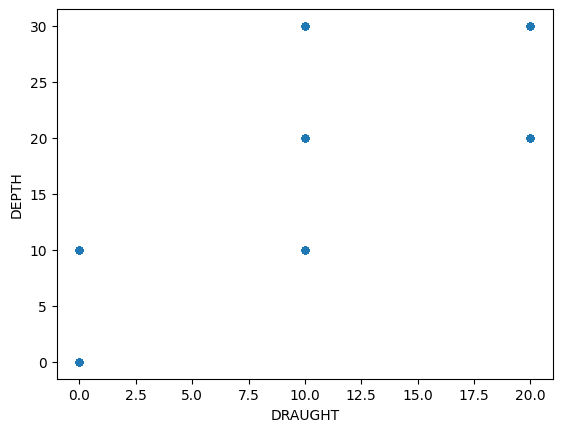

In [ ]:
data.plot.scatter(x='DRAUGHT', y='DEPTH')

# DRAUGHT 가 0이면 DEPTH 도 0이다.
# DRAUGHT는 0, 10, 20, 30으로 구간화 되어 있으며 이는 DEPTH에서 10~20을 뺀 값과 같다
# 사람의 임의로 작성 한 것 or 구간화가 되어 있는 상태


# DEPTH와 DRAUGHT가 동일한 값은 이상치 아닌가?

<Axes: xlabel='DRAUGHT', ylabel='DEPTH'>

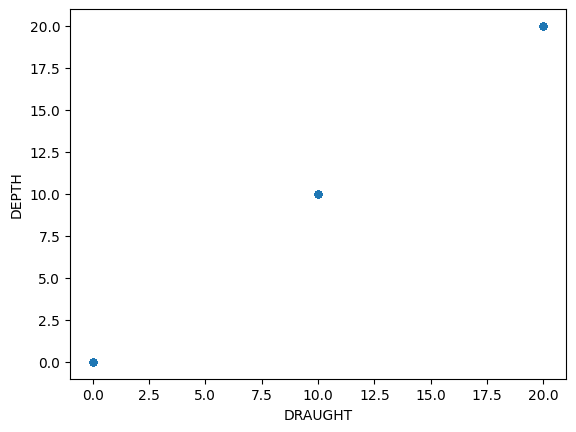

In [ ]:
data[(data['DEPTH'] == data['DRAUGHT'])].plot.scatter(x='DRAUGHT', y='DEPTH')

# # DEPTH와 DRAUGHT가 동일한 값 : 18만개 가량 존재함
# 깊이만큼 잠겼다는 것은 DEADWEIGHT, GT의 비율이 높은 값인가?
# 그리고 이는 target값과 상관성이 있는가?

### 가설 5-1. 깊이만큼 잠겼다는 것은 DEADWEIGHT, GT의 값이 높을 것이다

In [ ]:
print(f'mean')
data[['DEPTH', 'DEADWEIGHT', 'GT', 'DRAUGHT', 'CI_HOUR']].dropna(axis=0).groupby(['DEPTH', 'DRAUGHT']).mean()

# 동일 DEPTH기준 더 깊은(높은) DRAUGHT의 samples들이  그렇지 않은 값들보다 큰 것을 확인

mean


DEADWEIGHT             GT    CI_HOUR
DEPTH DRAUGHT                                         
0.0   0.0        1122.310902     651.579902  65.544016
10.0  0.0        2129.264966    1112.749439  70.524570
      10.0      15563.312758   11308.131604  47.988918
20.0  10.0      62037.812318   42335.528583  63.618389
      20.0     181544.181579   95742.127203  82.877248
30.0  10.0      99144.873001  111473.753528  38.946476
      20.0     193766.904352  148497.418244  85.015394

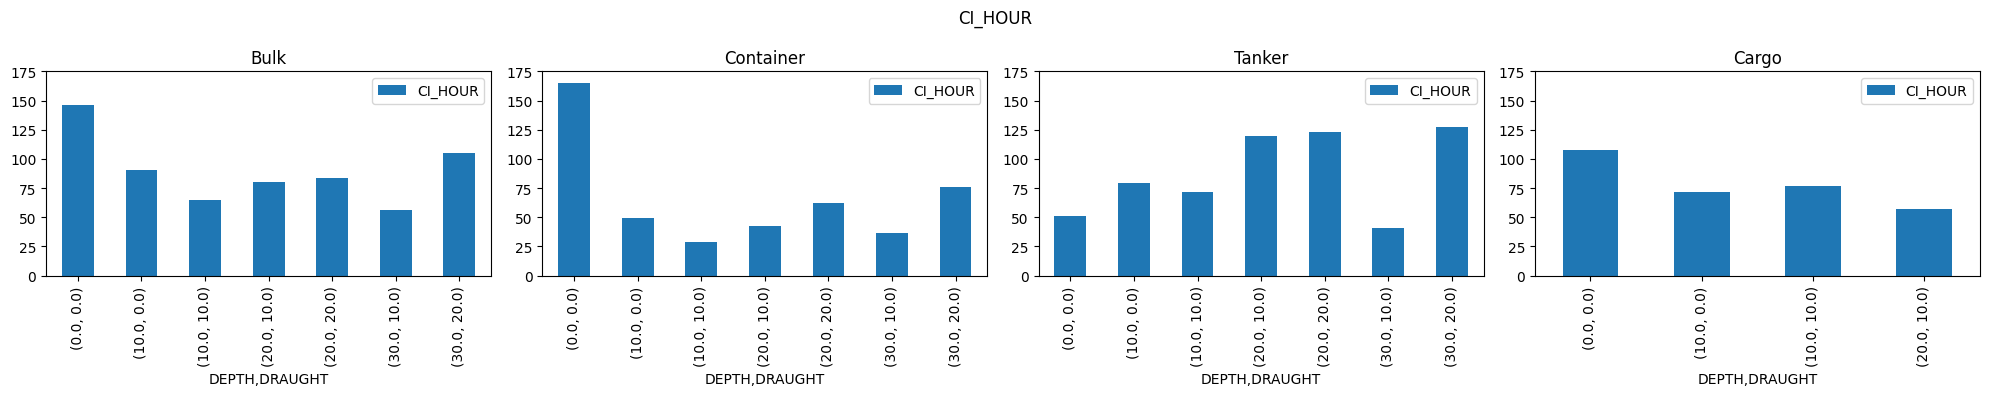

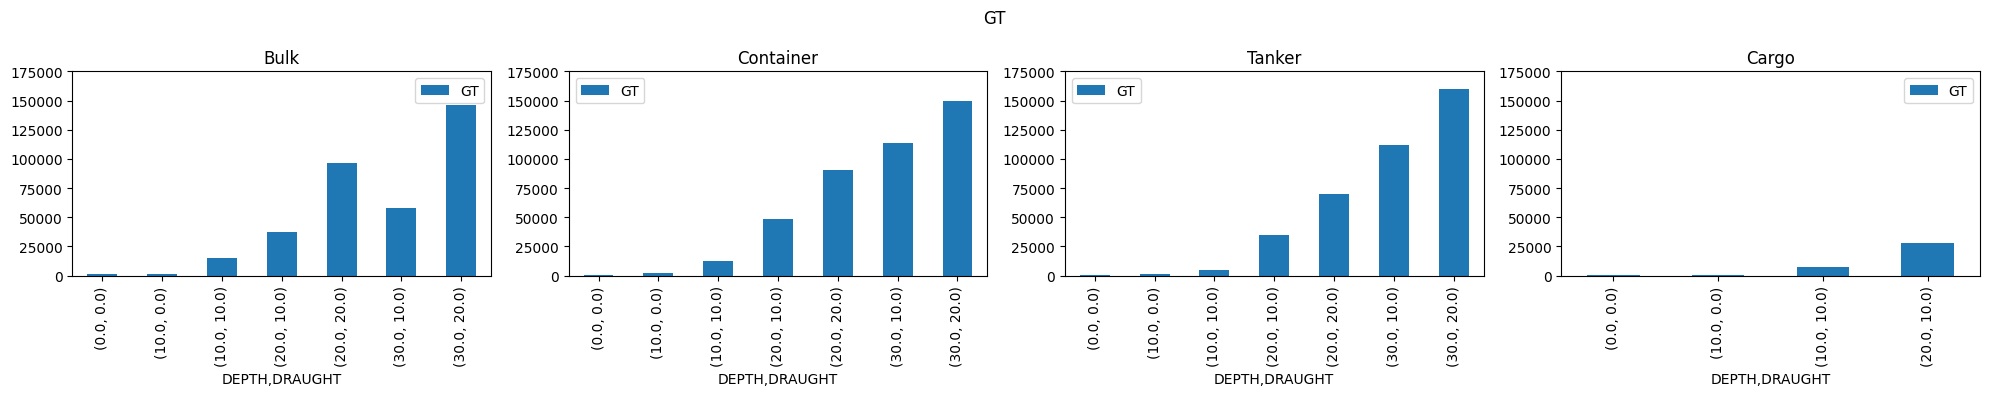

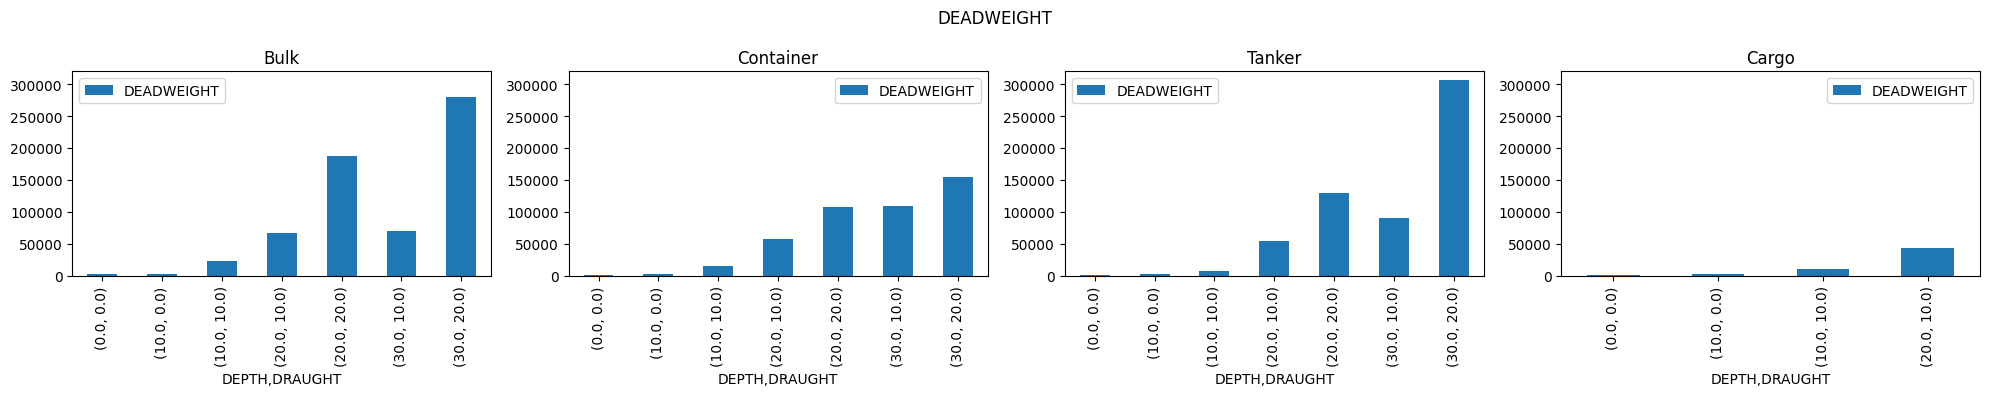

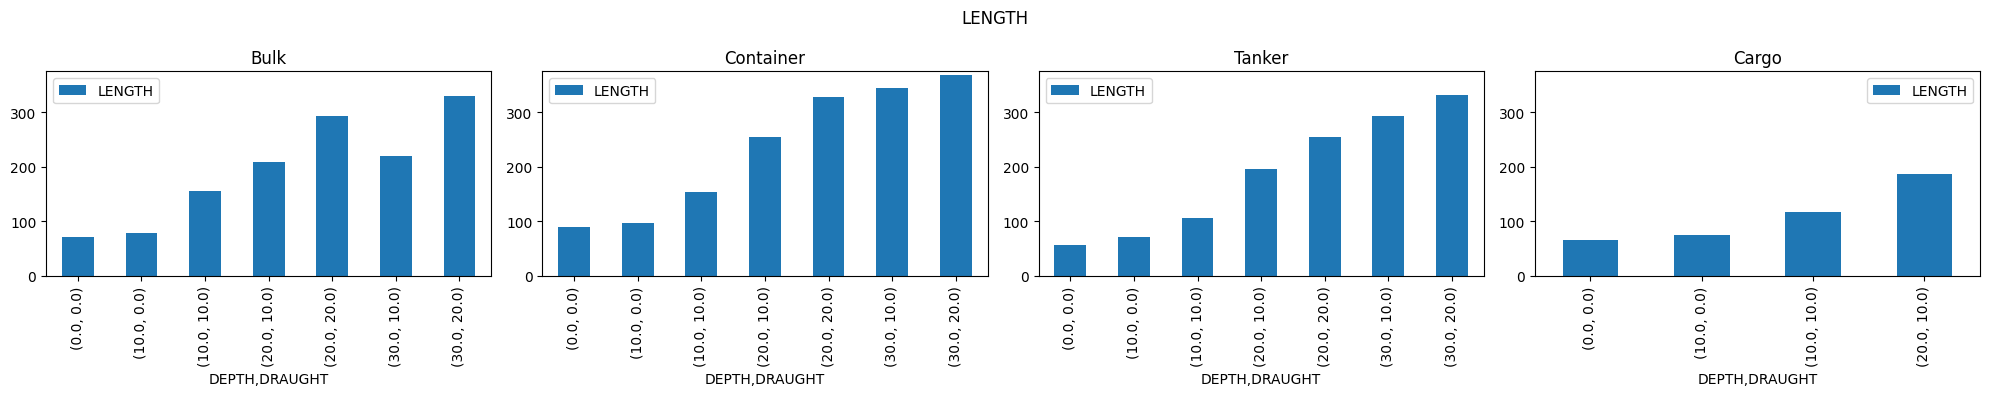

In [ ]:
ship_cate = data['SHIP_TYPE_CATEGORY'].unique()

fig, ax = plt.subplots(1, 4, figsize=(20, 4))
for idx, cat in enumerate(ship_cate):
    try:
        data_5_1_groupy = data[['DEPTH', 'CI_HOUR', 'DRAUGHT']][(data['SHIP_TYPE_CATEGORY'] == cat)].dropna(axis=0).groupby(['DEPTH', 'DRAUGHT']).mean()
        data_5_1_groupy.plot.bar(ax=ax[idx])
        ax[idx].set_title(cat)
        ax[idx].set_ylim((0, 175))
    except:
        pass
plt.suptitle('CI_HOUR')
plt.tight_layout()
plt.show()
plt.close()


fig, ax = plt.subplots(1, 4, figsize=(20, 4))
for idx, cat in enumerate(ship_cate):
    try:
        data_5_1_groupy = data[['DEPTH', 'GT', 'DRAUGHT']][(data['SHIP_TYPE_CATEGORY'] == cat)].dropna(axis=0).groupby(['DEPTH', 'DRAUGHT']).mean()
        data_5_1_groupy.plot.bar(ax=ax[idx])
        ax[idx].set_title(cat)
        ax[idx].set_ylim((0, 175000))
    except:
        pass
plt.suptitle('GT')
plt.tight_layout()
plt.show()
plt.close()



fig, ax = plt.subplots(1, 4, figsize=(20, 4))
for idx, cat in enumerate(ship_cate):
    try:
        data_5_1_groupy = data[['DEPTH', 'DEADWEIGHT', 'DRAUGHT']][(data['SHIP_TYPE_CATEGORY'] == cat)].dropna(axis=0).groupby(['DEPTH', 'DRAUGHT']).mean()
        data_5_1_groupy.plot.bar(ax=ax[idx])
        ax[idx].set_title(cat)
        ax[idx].set_ylim((0, 320000))
    except:
        pass
plt.suptitle('DEADWEIGHT')
plt.tight_layout()
plt.show()
plt.close()

fig, ax = plt.subplots(1, 4, figsize=(20, 4))
for idx, cat in enumerate(ship_cate):
    try:
        data_5_1_groupy = data[['DEPTH', 'LENGTH', 'DRAUGHT']][(data['SHIP_TYPE_CATEGORY'] == cat)].dropna(axis=0).groupby(['DEPTH', 'DRAUGHT']).mean()
        data_5_1_groupy.plot.bar(ax=ax[idx])
        ax[idx].set_title(cat)
        ax[idx].set_ylim((0, 375))
    except:
        pass
plt.suptitle('LENGTH')
plt.tight_layout()
plt.show()
plt.close()

# 선박 카테고리로 나누어보니 각 TYPE별 평균이 다름을 확인

In [ ]:
# 애초에 DEPTH = 0, 은 존재할 수 없음
print(f'count')
data[['DEPTH', 'DEADWEIGHT', 'GT', 'DRAUGHT', 'SHIP_TYPE_CATEGORY']].dropna(axis=0).groupby(['DEPTH', 'DRAUGHT', 'SHIP_TYPE_CATEGORY']).count()

# 전처리 : DEPTH, DRAUGHT에 10씩 더해주기

count


DEADWEIGHT     GT
DEPTH DRAUGHT SHIP_TYPE_CATEGORY                   
0.0   0.0     Bulk                        24     24
              Cargo                     1371   1371
              Container                    7      7
              Tanker                    4111   4111
10.0  0.0     Bulk                       651    651
              Cargo                    12258  12258
              Container                 1965   1965
              Tanker                    2064   2064
      10.0    Bulk                     25867  25867
              Cargo                    24082  24082
              Container                71520  71520
              Tanker                   10077  10077
20.0  10.0    Bulk                     89957  89957
              Cargo                     3093   3093
              Container                75622  75622
              Tanker                    3108   3108
      20.0    Bulk                     41696  41696
              Container                 2625   2625
              Tanker                     442    442
30.0  10.0    Bulk                        27     27
              Container                  539    539
              Tanker                     497    497
      20.0    Bulk                      6079   6079
              Container                14037  14037
              Tanker                     219    219

### 가설 5-2. DEPTH가 30일 경우 존재하는 DRAUGHT = 10, 20 은 적재화물과 관련이 있을 것이다

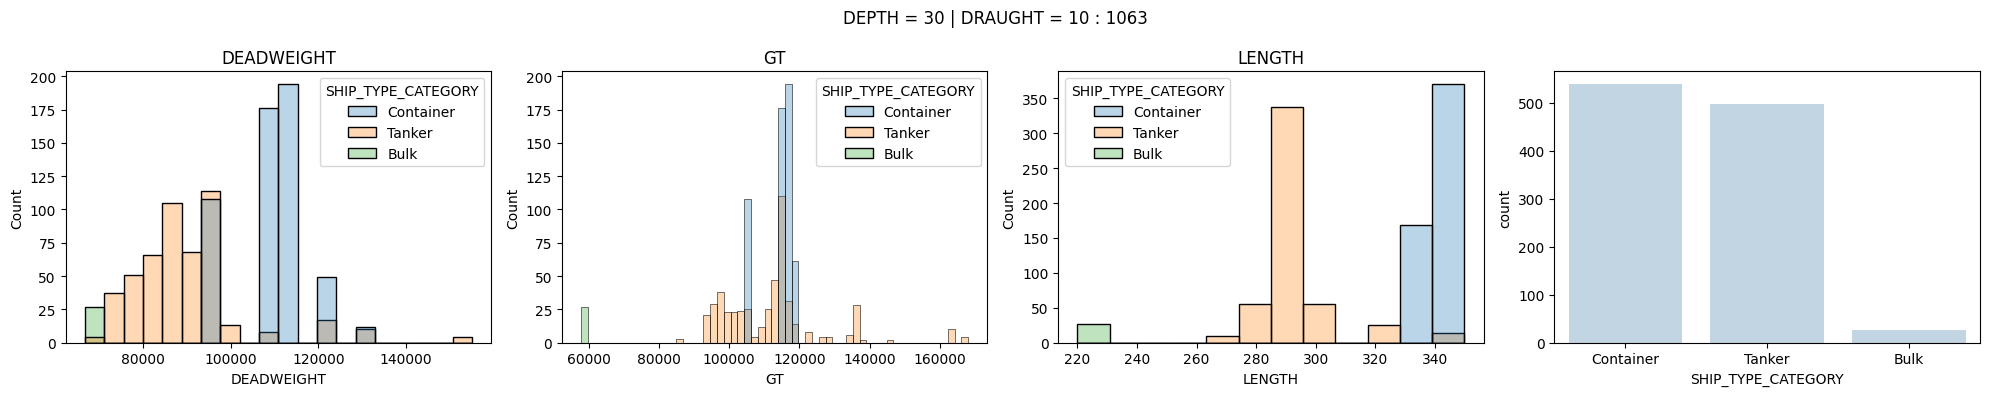

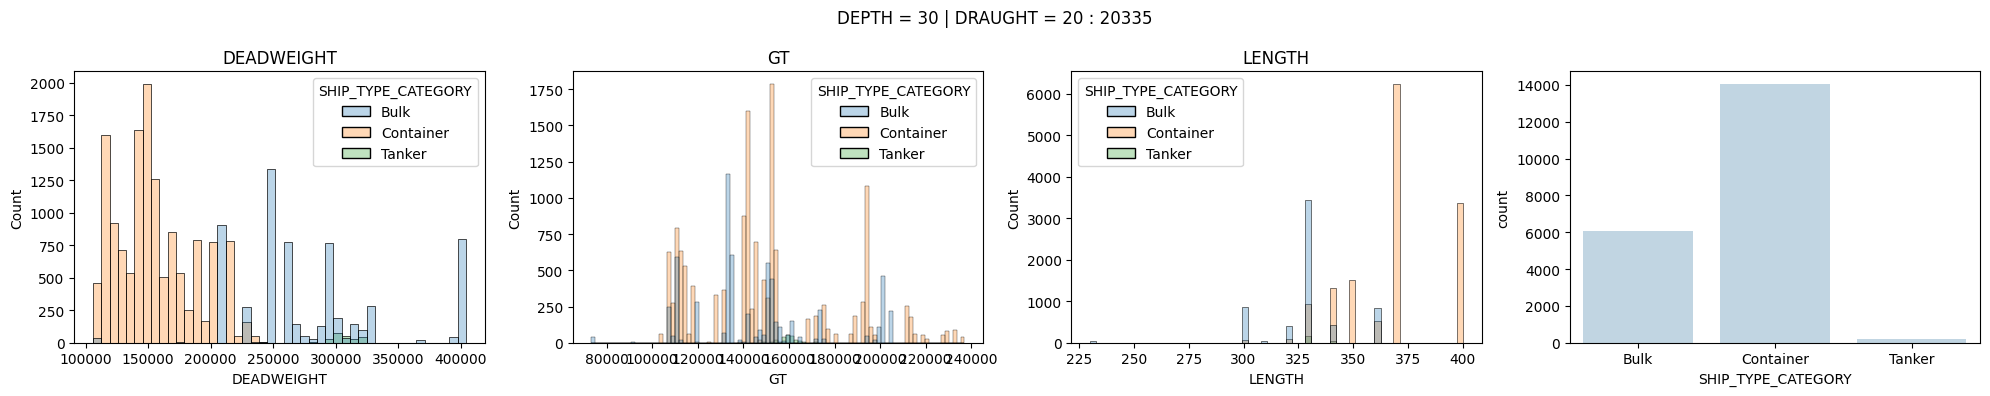

In [ ]:
data_5_1_20 = data[(data['DEPTH'] == 30) & (data['DRAUGHT'] == 10)]
# DEADWEIGHT, GT, LENGTH

fig, ax = plt.subplots(1, 4, figsize=(20, 4))
sns.histplot(data = data_5_1_20, x='DEADWEIGHT', ax=ax[0], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_5_1_20, x='GT', ax=ax[1], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_5_1_20, x='LENGTH', ax=ax[2], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.countplot(data = data_5_1_20, x='SHIP_TYPE_CATEGORY', ax=ax[3], alpha=0.3)

ax[0].set_title('DEADWEIGHT')
ax[1].set_title('GT')
ax[2].set_title('LENGTH')

plt.suptitle(f'DEPTH = 30 | DRAUGHT = 10 : {data_5_1_20.shape[0]}')
plt.tight_layout()
plt.show()


data_5_1_20 = data[(data['DEPTH'] == 30) & (data['DRAUGHT'] == 20)]

fig, ax = plt.subplots(1, 4, figsize=(20, 4))
sns.histplot(data = data_5_1_20, x='DEADWEIGHT', ax=ax[0], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_5_1_20, x='GT', ax=ax[1], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.histplot(data = data_5_1_20, x='LENGTH', ax=ax[2], hue='SHIP_TYPE_CATEGORY', alpha=0.3)
sns.countplot(data = data_5_1_20, x='SHIP_TYPE_CATEGORY', ax=ax[3], alpha=0.3)

ax[0].set_title('DEADWEIGHT')
ax[1].set_title('GT')
ax[2].set_title('LENGTH')

plt.suptitle(f'DEPTH = 30 | DRAUGHT = 20 : {data_5_1_20.shape[0]}')
plt.tight_layout()
plt.show()

# 가설 6. DIST가 0이면 CI_HOUR도 0이어야 한다


In [ ]:
data_6 = data[data['DIST'] == 0][data['CI_HOUR'] != 0][['DIST', 'CI_HOUR']]

print(data_6.shape)
data_6

# DIST가 0일 때 CI_HOUR값이 0이 아니다
    # 0에 거의 수렴하는 값 / 아예 큰 값을 가진 값이 존재함

(28, 2)


/var/folders/kp/_7nd3lrs4ll39lsw8nm4r_b80000gn/T/ipykernel_5681/4165502213.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_6 = data[data['DIST'] == 0][data['CI_HOUR'] != 0][['DIST', 'CI_HOUR']]


,DIST,CI_HOUR
389245,0.0,143.203889
2521,0.0,280.732778
314316,0.0,0.568611
306130,0.0,0.050000
77864,0.0,0.050000
237396,0.0,0.099167
130517,0.0,158.303333
26501,0.0,0.049167
36741,0.0,10.000000
212002,0.0,95.951667


In [ ]:
data[data['DIST'] == 0][data['CI_HOUR'] == 0]

# DIST 삭제
    # data['DIST'] == 0 & data['CI_HOUR'] == 0 삭제
    # data['DIST'] == 0 & data['CI_HOUR'] == 0 삭제 안함

/var/folders/kp/_7nd3lrs4ll39lsw8nm4r_b80000gn/T/ipykernel_5681/375949069.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['DIST'] == 0][data['CI_HOUR'] == 0]


,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR,year,month,day,hour,minute,weekday,DEADWEIGHT_GT
322693,TRAIN_322693,BR,VFD8,Bulk,0.0,2014-09-01 00:05:00,S736157,30.0,22,50300,20.0,10.0,28000,190.0,SDES23,Panama,NaN,NaN,NaN,NaN,22,0.000061,0.0,2014,9,1,0,5,0,0.556660
352736,TRAIN_352736,ZA,CXL1,Bulk,0.0,2014-09-01 00:05:00,I488233,40.0,12,181000,20.0,20.0,92800,290.0,YIDV54,Isle Of Man,NaN,NaN,NaN,NaN,2,0.000026,0.0,2014,9,1,0,5,0,0.512707
151588,TRAIN_151588,BR,VFD8,Bulk,0.0,2014-09-01 00:14:00,S763672,30.0,14,76600,20.0,10.0,39700,220.0,FAJR56,Panama,NaN,NaN,NaN,NaN,22,0.000061,0.0,2014,9,1,0,14,0,0.518277
321173,TRAIN_321173,RU,HGH2,Bulk,0.0,2014-09-01 00:27:00,O124735,40.0,39,81000,20.0,10.0,48800,240.0,HIXD54,"Korea, South",NaN,NaN,NaN,NaN,3,0.000069,0.0,2014,9,1,0,27,0,0.602469
260639,TRAIN_260639,CA,PUF3,Bulk,0.0,2014-09-01 00:27:00,D232875,20.0,50,30000,10.0,10.0,18000,200.0,JXIH61,Canada,NaN,NaN,NaN,NaN,21,0.000107,0.0,2014,9,1,0,27,0,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323571,TRAIN_323571,JP,QYY1,Cargo,0.0,2023-02-28 08:55:00,P865451,10.0,8,1670,10.0,0.0,500,70.0,NBCV14,Japan,1.07,1.10,15.5,1.499178,17,0.000552,0.0,2023,2,28,8,55,1,0.299401
39745,TRAIN_039745,LV,UEW5,Cargo,0.0,2023-02-28 09:20:00,I872345,10.0,29,4230,10.0,10.0,2900,90.0,KMRW36,Barbados,8.27,-1.46,2.8,4.655602,11,0.000074,0.0,2023,2,28,9,20,1,0.685579
83272,TRAIN_083272,CN,EUC8,Bulk,0.0,2023-02-28 09:27:00,B842831,50.0,2,211000,20.0,20.0,109000,300.0,WAIS64,"Hong Kong, China",-2.21,5.70,13.2,3.767495,17,0.001614,0.0,2023,2,28,9,27,1,0.516588
2625,TRAIN_002625,CN,QQW1,Container,0.0,2023-02-28 09:34:00,Q521624,40.0,22,68200,20.0,10.0,66100,280.0,BGWI26,Liberia,1.65,0.89,14.7,1.713251,17,0.000595,0.0,2023,2,28,9,34,1,0.969208


In [ ]:
data_6 = data[data['DIST'] == 0][data['CI_HOUR'] > 0][data['CI_HOUR'] <= 24][['DIST', 'CI_HOUR']]

print(data_6.shape)
data_6

# DIST가 0일 때 CI_HOUR값이 0이 아니다
    # 0에 거의 수렴하는 값 / 아예 큰 값을 가진 값이 존재함
    # 이 값들은 사용해도 괜찮을 것 같음 => 모델이 이런 상황도 인지 할 수 있도록

(17, 2)


/var/folders/kp/_7nd3lrs4ll39lsw8nm4r_b80000gn/T/ipykernel_5681/3686465061.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_6 = data[data['DIST'] == 0][data['CI_HOUR'] > 0][data['CI_HOUR'] <= 24][['DIST', 'CI_HOUR']]
/var/folders/kp/_7nd3lrs4ll39lsw8nm4r_b80000gn/T/ipykernel_5681/3686465061.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_6 = data[data['DIST'] == 0][data['CI_HOUR'] > 0][data['CI_HOUR'] <= 24][['DIST', 'CI_HOUR']]


,DIST,CI_HOUR
314316,0.0,0.568611
306130,0.0,0.050000
77864,0.0,0.050000
237396,0.0,0.099167
26501,0.0,0.049167
36741,0.0,10.000000
146884,0.0,8.650278
270856,0.0,1.201667
196830,0.0,11.499722
6439,0.0,0.748611


# 가설 7. SHIPMANAGER은 여러개의 선박을 소유할 수 있다

In [ ]:
cols = ['SHIPMANAGER', 'SHIP_TYPE_CATEGORY']

data_7 = data[cols]

list_SHIPMANAGER = data_7['SHIPMANAGER'].unique()

one_managers = list()
bi_managers = list()
tri_managers = list()
qurd_managers = list()

zero_managers = list()

for manager in tqdm(list_SHIPMANAGER):

    data_7_ = data_7[data_7['SHIPMANAGER'] == manager]
    list_cate_unique = data_7_['SHIP_TYPE_CATEGORY'].unique()

    if len(list_cate_unique) == 1:
        one_managers.append(manager)

    elif len(list_cate_unique) == 2:
        bi_managers.append(manager)

    elif len(list_cate_unique) == 3:
        tri_managers.append(manager)

    elif len(list_cate_unique) == 4:
        qurd_managers.append(manager)

    elif len(list_cate_unique) == 0:
        zero_managers.append(manager)


print(f'0개 소유 : {len(zero_managers)}명')
print(f'1개 소유 : {len(one_managers)}명')
print(f'2개 소유 : {len(bi_managers)}명')
print(f'3개 소유 : {len(tri_managers)}명')
print(f'4개 소유 : {len(qurd_managers)}명')


# 총 6566명

# 0개 소유 : 0명
# 1개 소유 : 5770명
# 2개 소유 : 685명
# 3개 소유 : 94명
# 4개 소유 : 17명

# 전처리 : 소유한 개수

100%|██████████| 6566/6566 [01:13<00:00, 88.80it/s]

0개 소유 : 0명
1개 소유 : 5770명
2개 소유 : 685명
3개 소유 : 94명
4개 소유 : 17명


In [ ]:
cols = ['SHIPMANAGER', 'SHIP_TYPE_CATEGORY']

data_7 = data[cols]

list_SHIPMANAGER = data_7['SHIPMANAGER'].unique()

one_managers = list()
bi_managers = list()
tri_managers = list()
qurd_managers = list()

zero_managers = list()

for manager in tqdm(list_SHIPMANAGER):

    data_7_ = data_7[data_7['SHIPMANAGER'] == manager]
    list_cate_unique = data_7_['SHIP_TYPE_CATEGORY'].unique()

    if len(list_cate_unique) == 1:
        one_managers.append(manager)

    elif len(list_cate_unique) == 2:
        bi_managers.append(manager)

    elif len(list_cate_unique) == 3:
        tri_managers.append(manager)

    elif len(list_cate_unique) == 4:
        qurd_managers.append(manager)

    elif len(list_cate_unique) == 0:
        zero_managers.append(manager)


print(f'0개 소유 : {len(zero_managers)}명')
print(f'1개 소유 : {len(one_managers)}명')
print(f'2개 소유 : {len(bi_managers)}명')
print(f'3개 소유 : {len(tri_managers)}명')
print(f'4개 소유 : {len(qurd_managers)}명')


# 총 6566명

# 0개 소유 : 0명
# 1개 소유 : 5770명
# 2개 소유 : 685명
# 3개 소유 : 94명
# 4개 소유 : 17명

# 전처리 : 소유한 개수

# 가설 8. 1명의 SHIPMANAGER은 하나의 FLAG만 가질 수 있다

In [ ]:
cols = ['SHIPMANAGER', 'FLAG']

data_8 = data[cols]

list_SHIPMANAGER = data_8['SHIPMANAGER'].unique()

managers_0 = list()
managers_1 = list()
managers_2 = list()
managers_3 = list()
managers_4 = list()
managers_5 = list()
managers_6 = list()
managers_7 = list()
managers_8 = list()
managers_9 = list()
managers_10 = list()
managers_11 = list()
managers_12 = list()
managers_13 = list()
managers_14 = list()
managers_15 = list()


for manager in tqdm(list_SHIPMANAGER):

    data_8_ = data_8[data_8['SHIPMANAGER'] == manager]
    list_flag_unique = data_8_['FLAG'].unique()



    if len(list_cate_unique) == 1:
        managers_1.append(manager)

    elif len(list_cate_unique) == 2:
        managers_2.append(manager)

    elif len(list_cate_unique) == 3:
        managers_3.append(manager)

    elif len(list_cate_unique) == 4:
        managers_4.append(manager)

    elif len(list_cate_unique) == 5:
        managers_5.append(manager)

    elif len(list_cate_unique) == 6:
        managers_6.append(manager)

    elif len(list_cate_unique) == 7:
        managers_7.append(manager)

    elif len(list_cate_unique) == 8:
        managers_8.append(manager)

    elif len(list_cate_unique) == 9:
        managers_9.append(manager)

    elif len(list_cate_unique) == 10:
        managers_10.append(manager)

    elif len(list_cate_unique) == 11:
        managers_11.append(manager)

    elif len(list_cate_unique) == 12:
        managers_12.append(manager)

    elif len(list_cate_unique) == 13:
        managers_13.append(manager)

    elif len(list_cate_unique) == 14:
        managers_14.append(manager)

    elif len(list_cate_unique) == 15:
        managers_15.append(manager)

    elif len(list_cate_unique) == 0:
        managers_0.append(manager)


print(f'0개 : {len(managers_0)}곳')
print(f'1개 : {len(managers_1)}곳')
print(f'2개 : {len(managers_2)}곳')
print(f'3개 : {len(managers_3)}곳')
print(f'4개 : {len(managers_4)}곳')
print(f'5개 : {len(managers_5)}곳')
print(f'6개 : {len(managers_6)}곳')
print(f'7개 : {len(managers_7)}곳')
print(f'8개 : {len(managers_8)}곳')
print(f'9개 : {len(managers_9)}곳')
print(f'10개 : {len(managers_10)}곳')
print(f'11개 : {len(managers_11)}곳')
print(f'12개 : {len(managers_12)}곳')
print(f'13개 : {len(managers_13)}곳')
print(f'14개 : {len(managers_14)}곳')
print(f'15개 : {len(managers_15)}곳')

# SHIPMANAGER의 국적이 바뀌는 일은 없었다

100%|██████████| 6566/6566 [01:15<00:00, 87.44it/s]

0개 : 0곳
1개 : 6566곳
2개 : 0곳
3개 : 0곳
4개 : 0곳
5개 : 0곳
6개 : 0곳
7개 : 0곳
8개 : 0곳
9개 : 0곳
10개 : 0곳
11개 : 0곳
12개 : 0곳
13개 : 0곳
14개 : 0곳
15개 : 0곳


# 가설 9. 항구별 선박 종류의 평균시간은 유효하다

In [ ]:
from scipy import  stats

In [ ]:
# 포트 이름 별 어떤 배가 많이 오는지?

list_po = data['ARI_PO'].unique().tolist()

list_mean_ci_hour_per_po_n_container = list()
list_mean_ci_hour_per_po_n_bulk = list()
list_mean_ci_hour_per_po_n_tanker = list()
list_mean_ci_hour_per_po_n_cargo = list()


for po in list_po:

    cond_po = data['ARI_PO'] == po

    num_samples = len(data[cond_po])

    cond_ship_container = data['SHIP_TYPE_CATEGORY'] == 'Container'
    cond_ship_bulk = data['SHIP_TYPE_CATEGORY'] == 'Bulk'
    cond_ship_cargo = data['SHIP_TYPE_CATEGORY'] == 'Cargo'
    cond_ship_tanker = data['SHIP_TYPE_CATEGORY'] == 'Tanker'

    print(f'\n\n항구 : {po}')
    #print(f'\tContainer : {np.round(len(data[cond_po & cond_ship_container]) / num_samples, 3) * 100} %')
    #print(f'\tBulk : {np.round(len(data[cond_po & cond_ship_bulk]) / num_samples, 3) * 100} %')
    #print(f'\tCargo : {np.round(len(data[cond_po & cond_ship_cargo]) / num_samples, 3) * 100} %')
    #print(f'\tTanker : {np.round(len(data[cond_po & cond_ship_tanker]) / num_samples, 3) * 100} %')

    mean_container = data[cond_po & cond_ship_container]['CI_HOUR'].mean()
    mean_bulk = data[cond_po & cond_ship_bulk]['CI_HOUR'].mean()
    mean_tanker = data[cond_po & cond_ship_tanker]['CI_HOUR'].mean()
    mean_cargo = data[cond_po & cond_ship_cargo]['CI_HOUR'].mean()

    list_mean_ci_hour_per_po_n_container.append(mean_container)
    list_mean_ci_hour_per_po_n_bulk.append(mean_bulk)
    list_mean_ci_hour_per_po_n_tanker.append(mean_tanker)
    list_mean_ci_hour_per_po_n_cargo.append(mean_cargo)

    p_container = stats.ttest_1samp(data[cond_po & cond_ship_container]['CI_HOUR'], mean_container)[1]
    p_bulk = stats.ttest_1samp(data[cond_po & cond_ship_bulk]['CI_HOUR'], mean_bulk)[1]
    p_tanker = stats.ttest_1samp(data[cond_po & cond_ship_tanker]['CI_HOUR'], mean_tanker)[1]
    p_cargo = stats.ttest_1samp(data[cond_po & cond_ship_cargo]['CI_HOUR'], mean_cargo)[1]

    print(f'\t P-value container : {p_container} : 평균 {np.round(mean_container, 3)}, {len(data[cond_po & cond_ship_container])}개 ')
    print(f'\t P-value bulk : {p_bulk} : 평균 {np.round(mean_bulk, 3)}, {len(data[cond_po & cond_ship_bulk])}개 ')
    print(f'\t P-value tanker : {p_tanker} : 평균 {np.round(mean_tanker, 3)}, {len(data[cond_po & cond_ship_tanker])}개 ')
    print(f'\t P-value cargo : {p_cargo} : 평균 {np.round(mean_cargo, 3)}, {len(data[cond_po & cond_ship_cargo])}개 ')



항구 : VFD8
	 P-value container : nan : 평균 nan, 0개 
	 P-value bulk : 1.0 : 평균 192.394, 3199개 
	 P-value tanker : 1.0 : 평균 443.659, 11개 
	 P-value cargo : 1.0 : 평균 153.281, 119개 


항구 : CXL1
	 P-value container : nan : 평균 nan, 0개 
	 P-value bulk : 1.0 : 평균 81.17, 1649개 
	 P-value tanker : nan : 평균 nan, 0개 
	 P-value cargo : 1.0 : 평균 48.114, 18개 


항구 : MMW5
	 P-value container : 1.0 : 평균 20.457, 562개 
	 P-value bulk : 1.0 : 평균 123.443, 1484개 
	 P-value tanker : nan : 평균 nan, 0개 
	 P-value cargo : 1.0 : 평균 48.705, 54개 


항구 : TMW2
	 P-value container : 1.0 : 평균 12.199, 13개 
	 P-value bulk : 1.0 : 평균 184.081, 3489개 
	 P-value tanker : 1.0 : 평균 137.906, 111개 
	 P-value cargo : 1.0 : 평균 121.828, 123개 


항구 : HGH2
	 P-value container : 1.0 : 평균 0.495, 2개 
	 P-value bulk : 1.0 : 평균 66.289, 1322개 
	 P-value tanker : 1.0 : 평균 33.036, 60개 
	 P-value cargo : 1.0 : 평균 41.27, 123개 


항구 : PUF3
	 P-value container : nan : 평균 0.0, 4개 
	 P-value bulk : 1.0 : 평균 3.22, 443개 
	 P-value tanker : nan : 평균 

/Users/jeong-gun-oh/miniconda3/envs/HD/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/jeong-gun-oh/miniconda3/envs/HD/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero




항구 : TYY2
	 P-value container : 1.0 : 평균 23.344, 926개 
	 P-value bulk : 1.0 : 평균 108.236, 890개 
	 P-value tanker : nan : 평균 nan, 0개 
	 P-value cargo : 1.0 : 평균 55.495, 5개 


항구 : YRT6
	 P-value container : 1.0 : 평균 24.332, 63개 
	 P-value bulk : 1.0 : 평균 95.941, 6988개 
	 P-value tanker : 1.0 : 평균 62.817, 23개 
	 P-value cargo : 1.0 : 평균 31.91, 42개 


항구 : JEN5
	 P-value container : 1.0 : 평균 34.666, 81개 
	 P-value bulk : 1.0 : 평균 60.465, 8160개 
	 P-value tanker : 1.0 : 평균 20.501, 57개 
	 P-value cargo : 1.0 : 평균 38.053, 181개 


항구 : URE2
	 P-value container : 1.0 : 평균 13.767, 1733개 
	 P-value bulk : 1.0 : 평균 33.585, 223개 
	 P-value tanker : 1.0 : 평균 109.143, 111개 
	 P-value cargo : 1.0 : 평균 27.546, 134개 


항구 : QGN3
	 P-value container : 1.0 : 평균 27.357, 404개 
	 P-value bulk : 1.0 : 평균 75.044, 872개 
	 P-value tanker : 1.0 : 평균 35.806, 44개 
	 P-value cargo : 1.0 : 평균 28.206, 205개 


항구 : AZU6
	 P-value container : 1.0 : 평균 167.532, 34개 
	 P-value bulk : 1.0 : 평균 71.399, 1734개 
	 P-value t

In [ ]:
po = 'VFD8'

cond_po = data['ARI_PO'] == po

num_samples = len(data[cond_po])

cond_ship_container = data['SHIP_TYPE_CATEGORY'] == 'Container'
cond_ship_bulk = data['SHIP_TYPE_CATEGORY'] == 'Bulk'
cond_ship_cargo = data['SHIP_TYPE_CATEGORY'] == 'Cargo'
cond_ship_tanker = data['SHIP_TYPE_CATEGORY'] == 'Tanker'

print(f'\n\n항구 : {po}')
#print(f'\tContainer : {np.round(len(data[cond_po & cond_ship_container]) / num_samples, 3) * 100} %')
#print(f'\tBulk : {np.round(len(data[cond_po & cond_ship_bulk]) / num_samples, 3) * 100} %')
#print(f'\tCargo : {np.round(len(data[cond_po & cond_ship_cargo]) / num_samples, 3) * 100} %')
#print(f'\tTanker : {np.round(len(data[cond_po & cond_ship_tanker]) / num_samples, 3) * 100} %')

mean_container = data[cond_po & cond_ship_container]['CI_HOUR'].mean()
mean_bulk = data[cond_po & cond_ship_bulk]['CI_HOUR'].mean()
mean_tanker = data[cond_po & cond_ship_tanker]['CI_HOUR'].mean()
mean_cargo = data[cond_po & cond_ship_cargo]['CI_HOUR'].mean()

list_mean_ci_hour_per_po_n_container.append(mean_container)
list_mean_ci_hour_per_po_n_bulk.append(mean_bulk)
list_mean_ci_hour_per_po_n_tanker.append(mean_tanker)
list_mean_ci_hour_per_po_n_cargo.append(mean_cargo)

p_container = stats.ttest_1samp(data[cond_po & cond_ship_container]['CI_HOUR'], mean_container)[1]
p_bulk = stats.ttest_1samp(data[cond_po & cond_ship_bulk]['CI_HOUR'], mean_bulk)[1]
p_tanker = stats.ttest_1samp(data[cond_po & cond_ship_tanker]['CI_HOUR'], mean_tanker)[1]
p_cargo = stats.ttest_1samp(data[cond_po & cond_ship_cargo]['CI_HOUR'], mean_cargo)[1]

print(f'\t P-value container : {p_container} : 평균 {np.round(mean_container, 3)}, {len(data[cond_po & cond_ship_container])}개 ')
print(f'\t P-value bulk : {p_bulk} : 평균 {np.round(mean_bulk, 3)}, {len(data[cond_po & cond_ship_bulk])}개 ')
print(f'\t P-value tanker : {p_tanker} : 평균 {np.round(mean_tanker, 3)}, {len(data[cond_po & cond_ship_tanker])}개 ')
print(f'\t P-value cargo : {p_cargo} : 평균 {np.round(mean_cargo, 3)}, {len(data[cond_po & cond_ship_cargo])}개 ')



항구 : VFD8
	 P-value container : nan : 평균 nan, 0개 
	 P-value bulk : 1.0 : 평균 192.394, 3199개 
	 P-value tanker : 1.0 : 평균 443.659, 11개 
	 P-value cargo : 1.0 : 평균 153.281, 119개 


# 가설 10. a라는 선박이 ABC 항구에 도착 시 대기하고 있는 선박의 갯수(종류별)은 대기시간과 연관이 있다

In [ ]:
train = data

train['CI_HOUR_timedelta'] = pd.to_timedelta(train['CI_HOUR'], unit="hours")

bert_time = train['ATA'] + train['CI_HOUR_timedelta']

train['BERT_TIME'] = bert_time

In [ ]:
train['waiting_container'] = 0
train['waiting_bulk'] = 0
train['waiting_cargo'] = 0
train['waiting_tanker'] = 0


train = train[['SAMPLE_ID', 'ARI_PO', 'ATA', 'waiting_container', 'waiting_bulk', 'waiting_cargo', 'waiting_tanker', 'BERT_TIME', 'SHIP_TYPE_CATEGORY']].copy()


list_cols = train.columns.tolist()

idx_sample_id = list_cols.index('SAMPLE_ID')
idx_po = list_cols.index('ARI_PO')
idx_ata = list_cols.index('ATA')
idx_bert = list_cols.index('BERT_TIME')
idx_type = list_cols.index('SHIP_TYPE_CATEGORY')

idx_waiting_container = list_cols.index('waiting_container')
idx_waiting_bulk = list_cols.index('waiting_bulk')
idx_waiting_cargo = list_cols.index('waiting_cargo')
idx_waiting_tanker = list_cols.index('waiting_tanker')

In [ ]:
from sklearn.preprocessing import  LabelEncoder

ata = train['ATA']
bert = train['BERT_TIME']

cols = ['ARI_PO', 'SAMPLE_ID', 'SHIP_TYPE_CATEGORY']

le = LabelEncoder()
for col in cols:
    train[col] = le.fit_transform(train[col])
    print(le.classes_)

train['ATA'] = ata
train['BERT_TIME'] = bert

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102]
[     0      1      2 ... 391936 391937 391938]
[0 1 2 3]


In [ ]:
train_np = train.to_numpy()

list_po = np.unique(train_np[:, idx_po])


for po in tqdm(list_po):
    cond_po = train_np[:, idx_po] == po

    train_po = train_np[cond_po]
    sample_ids_train = np.unique(train_po[:, idx_sample_id])


    for sample_id in sample_ids_train:
        cond_sample_id = train_po[:, idx_sample_id] == sample_id

        check_ata = train_po[
            (train_po[:, idx_ata] < train_po[cond_sample_id][:, idx_ata][0]) &
            (train_po[:, idx_bert] > train_po[cond_sample_id][:, idx_ata][0])
        ]

        count_ship = check_ata[:, idx_type]
        count_container = (count_ship == 2).sum()
        count_bulk = (count_ship == 0).sum()
        count_cargo = (count_ship== 1).sum()
        count_tanker = (count_ship == 3).sum()

        cond_sample_id = train_np[:, idx_sample_id] == sample_id

        #train_np_id = train_np[cond_sample_id]
        train_np[cond_sample_id, idx_waiting_container] = count_container
        train_np[cond_sample_id, idx_waiting_bulk] = count_bulk
        train_np[cond_sample_id, idx_waiting_cargo] = count_cargo
        train_np[cond_sample_id, idx_waiting_tanker] = count_tanker

100%|██████████| 103/103 [1:01:15<00:00, 35.68s/it]


In [ ]:
train_waiting = pd.DataFrame(data=train_np, columns=['SAMPLE_ID', 'ARI_PO', 'ATA', 'waiting_container', 'waiting_bulk', 'waiting_cargo', 'waiting_tanker', 'BERT_TIME', 'SHIP_TYPE_CATEGORY'])

In [ ]:
train = pd.read_csv('/train.csv')
test = pd.read_csv('/test.csv')

def process_datetime(data):

    # datetime 컬럼 처리
    data['ATA'] = pd.to_datetime(data['ATA'])

    # datetime을 여러 파생 변수로 변환
    data['year'] = data['ATA'].dt.year
    data['month'] = data['ATA'].dt.month
    data['day'] = data['ATA'].dt.day
    data['hour'] = data['ATA'].dt.hour
    data['minute'] = data['ATA'].dt.minute
    data['weekday'] = data['ATA'].dt.weekday

    return data

train = train.sort_values('ATA')
train = process_datetime(train)
test = process_datetime(test)

In [ ]:
train_waiting_pre = pd.concat([train[['ARI_PO', 'year', 'month', 'day', 'hour', 'minute', 'weekday']], train_waiting[['waiting_container', 'waiting_bulk', 'waiting_cargo', 'waiting_tanker']]], axis=1)

In [ ]:
def pre_weekday_binding(data):
    weekday_binded = []  # 비어있는 리스트를 생성하여 바인딩된 값을 저장할 것입니다.

    for i in data['weekday']:
        if i < 5:
            weekday_binded.append(0)  # 월요일부터 금요일까지는 0으로 매핑
        elif i == 5:
            weekday_binded.append(1)  # 토요일은 1로 매핑
        else:
            weekday_binded.append(2)  # 일요일은 2로 매핑

    data['weekday_binded'] = weekday_binded  # 새로운 'weekday_binded' 열을 데이터프레임에 추가

    return data

# train_waiting_pre 데이터프레임에 'weekday_binded' 열을 추가합니다.
train_waiting_pre = pre_weekday_binding(train_waiting_pre)

# test 데이터프레임에 'weekday_binded' 열을 추가합니다.
test = pre_weekday_binding(test)

In [ ]:
train_waiting_pre[['mean_waiting_container', 'mean_waiting_bulk', 'mean_waiting_cargo', 'mean_waiting_tanker']] = 0
test[['mean_waiting_container', 'mean_waiting_bulk', 'mean_waiting_cargo', 'mean_waiting_tanker']] = 0

In [ ]:
list_cols = train_waiting_pre.columns.tolist()
idx_po = list_cols.index('ARI_PO')
idx_year = list_cols.index('year')
idx_month = list_cols.index('month')
idx_day = list_cols.index('day')
idx_hour = list_cols.index('hour')
idx_minute = list_cols.index('minute')
idx_week_binded = list_cols.index('weekday_binded')

idx_waiting_container = list_cols.index('waiting_container')
idx_waiting_bulk = list_cols.index('waiting_bulk')
idx_waiting_cargo = list_cols.index('waiting_cargo')
idx_waiting_tanker = list_cols.index('waiting_tanker')

idx_mean_waiting_container = list_cols.index('mean_waiting_container')
idx_mean_waiting_bulk = list_cols.index('mean_waiting_bulk')
idx_mean_waiting_cargo = list_cols.index('mean_waiting_cargo')
idx_mean_waiting_tanker = list_cols.index('mean_waiting_tanker')

list_cols

['ARI_PO',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'weekday',
 'waiting_container',
 'waiting_bulk',
 'waiting_cargo',
 'waiting_tanker',
 'weekday_binded',
 'mean_waiting_container',
 'mean_waiting_bulk',
 'mean_waiting_cargo',
 'mean_waiting_tanker']

In [ ]:
list_cols_test = test.columns.tolist()
test_idx_po = list_cols_test.index('ARI_PO')
test_idx_year = list_cols_test.index('year')
test_idx_month = list_cols_test.index('month')
test_idx_day = list_cols_test.index('day')
test_idx_hour = list_cols_test.index('hour')
test_idx_minute = list_cols_test.index('minute')
test_idx_week_binded = list_cols_test.index('weekday_binded')


test_idx_mean_waiting_container = list_cols_test.index('mean_waiting_container')
test_idx_mean_waiting_bulk = list_cols_test.index('mean_waiting_bulk')
test_idx_mean_waiting_cargo = list_cols_test.index('mean_waiting_cargo')
test_idx_mean_waiting_tanker = list_cols_test.index('mean_waiting_tanker')

In [ ]:
train_np = np.array(train_waiting_pre)
test_np = np.array(test)


list_po_uni = np.unique(train_np[:, idx_po])

for po in tqdm(list_po_uni):
    train_np_pre = np.array(train_waiting_pre)
    cond_po = train_np_pre[:, idx_po] == po
    cond_po_impu = train_np[:, idx_po] == po
    cond_po_impu_test = test_np[:, test_idx_po] == po

    train_np_po = train_np_pre[cond_po]
    list_year_uni = np.unique(train_np_po[:, idx_year])
    #print(f'✅ : {po}')

    for year in list_year_uni:
        cond_year = train_np_po[:, idx_year] == year
        cond_year_impu = train_np[:, idx_year] == year
        cond_year_impu_test = test_np[:, test_idx_year] == year

        train_np_year = train_np_po[cond_year]
        list_month_uni = np.unique(train_np_year[:, idx_month])
        #print(f'\tyear : {year}')
        for month in list_month_uni:
            cond_month = train_np_year[:, idx_month] == month
            cond_month_impu = train_np[:, idx_month] == month
            cond_month_impu_test = test_np[:, test_idx_month] == month

            train_np_month = train_np_year[cond_month]
            list_week_uni = np.unique(train_np_month[:, idx_week_binded])
            #print(f'\t\tmonth : {month} | {train_np_month.shape}')

            for week in list_week_uni:
                cond_week = train_np_month[:, idx_week_binded] == week
                cond_week_impu = train_np[:, idx_week_binded] == week
                cond_week_impu_test = test_np[:, test_idx_week_binded] == week

                train_np_week = train_np_month[cond_week] # 최종
                list_day_uni = np.unique(train_np_week[:, idx_day])
                #print(f'\t\t\tweek : {week} | {train_np_week.shape}')
                for day in list_day_uni:

                    cond_day = train_np_week[:, idx_day] == day
                    cond_day_impu = train_np[:, idx_day] == day
                    cond_day_impu_test = test_np[:, test_idx_day] == day

                    train_np_day = train_np_week[cond_day]
                    #print(f'\t\t\t\tday : {day} | {train_np_day.shape}\t\t')
                    #print(f'\t\t\t\t{train_np_day[:, idx_mean_waiting_container]}\t\t')
                    #print(f'\t\t\t\t{np.mean(train_np_day[:, idx_mean_waiting_container])}\t\t')
                    #list_hour_uni = np.unique(train_np_day[:, idx_hour])
                    #print(f'\t\t\t\tday : {day} | {train_np_day.shape}')

                    #for hour in list_hour_uni:
                        #cond_hour = train_np_day[:, idx_hour] == hour
                        #cond_hour_impu = train_np[:, idx_hour] == hour

                    train_np_total = train_np_day   # 최종
                    total_cond_impu = (cond_po_impu & cond_year_impu & cond_month_impu & cond_day_impu & cond_week_impu)
                    total_cond_impu_test = (cond_po_impu_test & cond_year_impu_test & cond_month_impu_test & cond_day_impu_test & cond_week_impu_test)

                    mean_container = np.mean(train_np_total[:, idx_waiting_container])
                    mean_bulk = np.mean(train_np_total[:, idx_waiting_bulk])
                    mean_cargo = np.mean(train_np_total[:, idx_waiting_cargo])
                    mean_tanker = np.mean(train_np_total[:, idx_waiting_tanker])

                    train_np[:, idx_mean_waiting_container][total_cond_impu] = mean_container
                    train_np[:, idx_mean_waiting_bulk][total_cond_impu] = mean_bulk
                    train_np[:, idx_mean_waiting_cargo][total_cond_impu] = mean_cargo
                    train_np[:, idx_mean_waiting_tanker][total_cond_impu] = mean_tanker

                    test_np[:, test_idx_mean_waiting_container][total_cond_impu_test] = mean_container
                    test_np[:, test_idx_mean_waiting_bulk][total_cond_impu_test] = mean_bulk
                    test_np[:, test_idx_mean_waiting_cargo][total_cond_impu_test] = mean_cargo
                    test_np[:, test_idx_mean_waiting_tanker][total_cond_impu_test] = mean_tanker

In [ ]:
train_waiting_preprocessed = pd.DataFrame(data=train_np, columns=train_waiting_pre.columns)
test_waiting_preprocessed = pd.DataFrame(data=test_np, columns=test.columns)

In [ ]:
train_waiting_preprocessed

,ARI_PO,year,month,day,hour,minute,weekday,waiting_container,waiting_bulk,waiting_cargo,waiting_tanker,weekday_binded,mean_waiting_container,mean_waiting_bulk,mean_waiting_cargo,mean_waiting_tanker
0,VFD8,2014,9,1,0,5,0,0,2,0,0,0,4,1,1,1
1,CXL1,2014,9,1,0,5,0,0,17,0,0,0,14,5,2,36
2,CXL1,2014,9,1,0,5,0,57,2,6,147,0,14,5,2,36
3,MMW5,2014,9,1,0,12,0,0,7,5,0,0,10,8,1,0
4,VFD8,2014,9,1,0,14,0,0,13,0,0,0,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391934,QYY1,2023,2,28,8,55,1,1,0,9,8,0,16,5,3,28
391935,UEW5,2023,2,28,9,20,1,1,0,0,0,0,1,0,0,0
391936,EUC8,2023,2,28,9,27,1,0,16,0,0,0,0,9,0,0
391937,QQW1,2023,2,28,9,34,1,0,2,0,0,0,0,2,0,0


In [ ]:
test_waiting_preprocessed

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,year,month,day,hour,minute,weekday,weekday_binded,mean_waiting_container,mean_waiting_bulk,mean_waiting_cargo,mean_waiting_tanker
0,TEST_000000,SG,GIW5,Container,1.826589,2020-06-18 11:58:00,K322654,50.0,18,117000,30.0,20.0,109000,340.0,KQMD74,Panama,0.37,1.63,27.1,1.587063,19,0.002615,2020,6,18,11,58,3,0,2,4,1,1
1,TEST_000001,CN,WEY7,Cargo,25.399386,2021-05-26 22:20:00,E376681,10.0,13,3810,10.0,10.0,2560,80.0,LBYS27,Belize,-2.79,-2.33,14.2,2.663972,6,0.001028,2021,5,26,22,20,2,0,11,7,2,13
2,TEST_000002,CN,NGG6,Container,111.079467,2019-12-16 00:09:00,F811111,20.0,26,10900,10.0,10.0,8440,140.0,EKFV15,Singapore,0.04,-4.91,9.3,3.255315,8,0.001743,2019,12,16,0,9,0,0,8,4,0,0
3,TEST_000003,CA,FFM2,Bulk,9.175258,2015-11-16 05:30:00,A737561,30.0,9,55800,20.0,10.0,31500,190.0,MASW32,Panama,NaN,NaN,NaN,NaN,2,0.000182,2015,11,16,5,30,0,0,1,2,1,0
4,TEST_000004,JP,QYY1,Container,0.0,2018-10-24 01:11:00,A827175,30.0,19,39800,20.0,10.0,33000,220.0,SIEL54,Liberia,NaN,NaN,NaN,NaN,10,0.000552,2018,10,24,1,11,2,0,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220486,TEST_220486,BR,TMW2,Bulk,21.712733,2017-04-04 15:53:00,E731427,60.0,15,298000,30.0,20.0,151000,330.0,UWHE18,Japan,NaN,NaN,NaN,NaN,13,0.00008,2017,4,4,15,53,1,0,0,0,1,3
220487,TEST_220487,CA,GRQ5,Bulk,4.87049,2016-08-22 16:22:00,Q434522,30.0,9,80500,20.0,10.0,42700,220.0,BBXV46,Liberia,NaN,NaN,NaN,NaN,13,0.000039,2016,8,22,16,22,0,0,62,1,0,0
220488,TEST_220488,JP,VYJ1,Tanker,17.068286,2022-07-10 14:53:00,U148516,10.0,14,1200,0.0,0.0,500,60.0,DYUA26,Japan,-2.87,1.22,27.4,2.405268,23,0.000264,2022,7,10,14,53,6,2,0,0,0,0
220489,TEST_220489,CN,QQW1,Cargo,0.0,2020-12-28 14:38:00,C235264,10.0,27,3420,10.0,0.0,2000,80.0,VKVS56,Belize,-2.65,-0.64,8.2,2.199039,22,0.000595,2020,12,28,14,38,0,0,15,4,1,4


In [ ]:
train_save_1 = pd.read_csv('')

In [ ]:
train_waiting_preprocessed_final = pd.concat([train, train_waiting_preprocessed[['mean_waiting_container', 'mean_waiting_bulk', 'mean_waiting_cargo', 'mean_waiting_tanker']]], axis=1)
test_waiting_preprocessed_final = pd.concat([test, test_waiting_preprocessed[['mean_waiting_container', 'mean_waiting_bulk', 'mean_waiting_cargo', 'mean_waiting_tanker']]], axis=1)

In [ ]:
train_waiting_preprocessed_final.to_csv('/train_final.csv', index=False)
test_waiting_preprocessed_final.to_csv('/test_final.csv', index=False)

In [ ]:
train_waiting

,ARI_PO,year,month,day,hour,minute,weekday,waiting_container,waiting_bulk,waiting_cargo,waiting_tanker,weekday_binded,mean_waiting_container,mean_waiting_bulk,mean_waiting_cargo,mean_waiting_tanker
0,VFD8,2014,9,1,0,5,0,0,2,0,0,0,4,1,1,1
1,CXL1,2014,9,1,0,5,0,0,17,0,0,0,14,5,2,36
2,CXL1,2014,9,1,0,5,0,57,2,6,147,0,14,5,2,36
3,MMW5,2014,9,1,0,12,0,0,7,5,0,0,10,8,1,0
4,VFD8,2014,9,1,0,14,0,0,13,0,0,0,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391934,QYY1,2023,2,28,8,55,1,1,0,9,8,0,16,5,3,28
391935,UEW5,2023,2,28,9,20,1,1,0,0,0,0,1,0,0,0
391936,EUC8,2023,2,28,9,27,1,0,16,0,0,0,0,9,0,0
391937,QQW1,2023,2,28,9,34,1,0,2,0,0,0,0,2,0,0
